In [1]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from sklearn.impute import SimpleImputer

import sys
import warnings
warnings.filterwarnings("ignore")

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [2]:
application_train = pd.read_csv(r"C:\Users\aksha\Downloads\Home-credit\application_train.csv")

In [3]:
application_train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [4]:
application_train.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

In [5]:
application_train.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3',

In [6]:
application_train.shape

(307511, 122)

In [7]:
# Number of each type of column
application_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [8]:

application_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [9]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [10]:
missing_values_table(application_train).head(10)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


Missing Values  % of Total Values
COMMONAREA_MEDI                   214865               69.9
COMMONAREA_AVG                    214865               69.9
COMMONAREA_MODE                   214865               69.9
NONLIVINGAPARTMENTS_MEDI          213514               69.4
NONLIVINGAPARTMENTS_MODE          213514               69.4
NONLIVINGAPARTMENTS_AVG           213514               69.4
FONDKAPREMONT_MODE                210295               68.4
LIVINGAPARTMENTS_MODE             210199               68.4
LIVINGAPARTMENTS_MEDI             210199               68.4
LIVINGAPARTMENTS_AVG              210199               68.4

In [11]:
application_train["TARGET"].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [12]:
# Percentage calculation
print("Percentage: ")
(application_train["TARGET"].value_counts()/application_train["TARGET"].count())*100

Percentage: 


0    91.927118
1     8.072882
Name: TARGET, dtype: float64

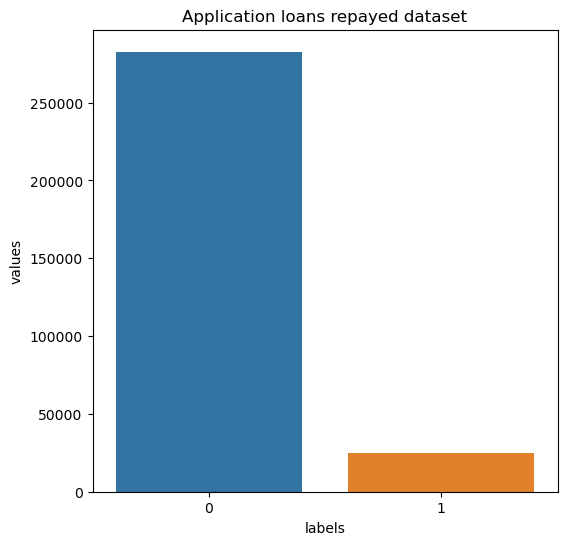

In [13]:
temp = application_train["TARGET"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
plt.figure(figsize = (6,6))
plt.title('Application loans repayed dataset')
sns.set_color_codes("pastel")
sns.barplot(x = 'labels', y="values", data=df)
plt.show()


In [14]:
def plot_stats(feature,label_rotation=False,horizontal_layout=True):
    temp = application_train[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = application_train[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x = feature, y="Number of contracts",data=df1)
    
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    s = sns.barplot(ax=ax2, x = feature, y='TARGET', order=cat_perc[feature], data=cat_perc)
    
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show();

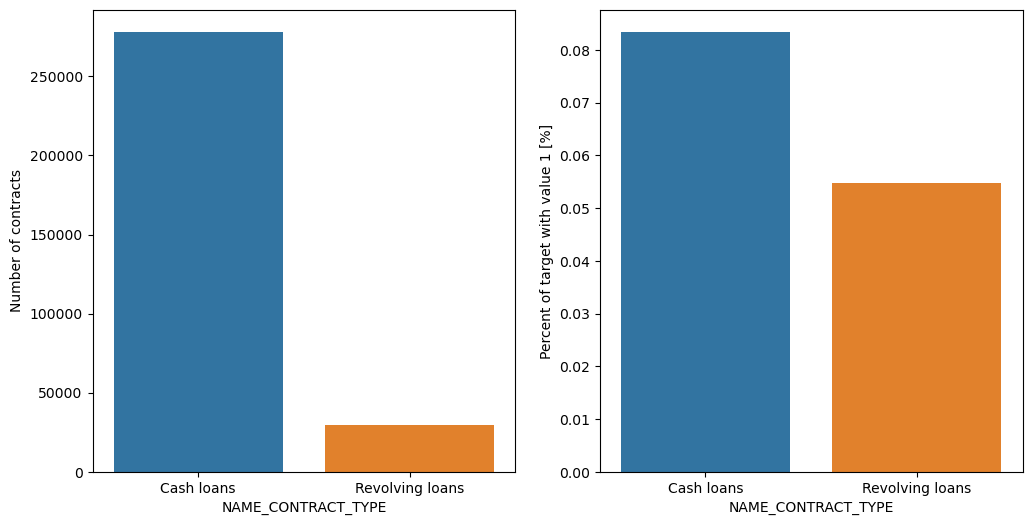

In [15]:
plot_stats('NAME_CONTRACT_TYPE')

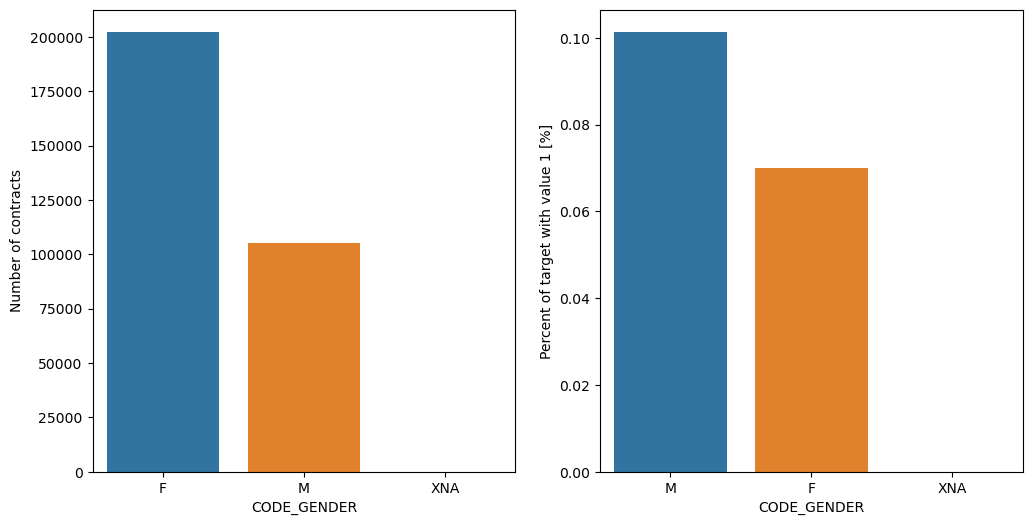

In [16]:
plot_stats('CODE_GENDER')

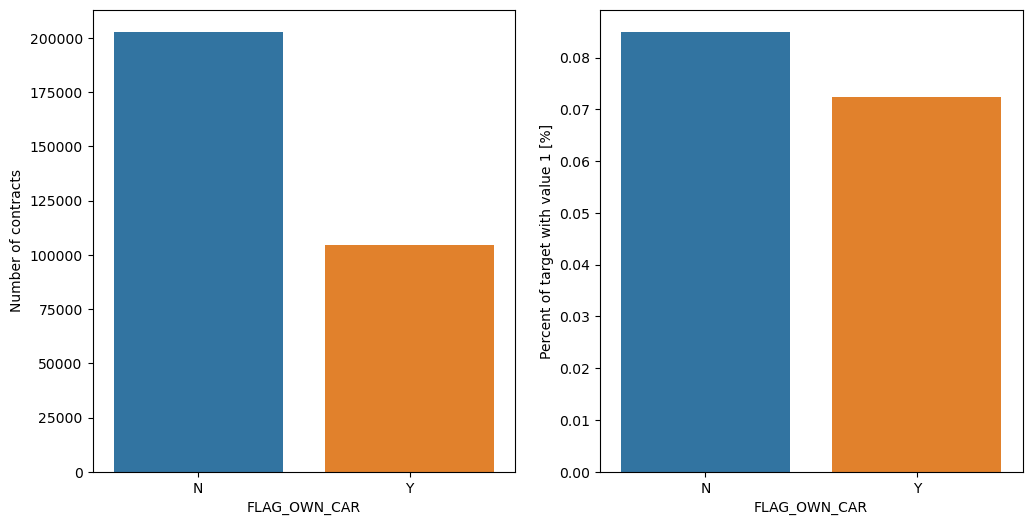

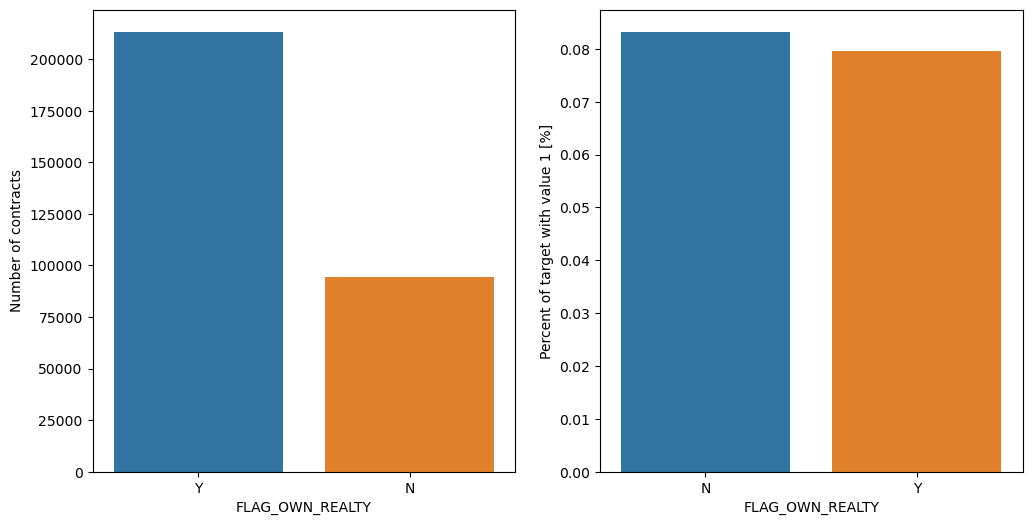

In [17]:
plot_stats('FLAG_OWN_CAR')
plot_stats('FLAG_OWN_REALTY')

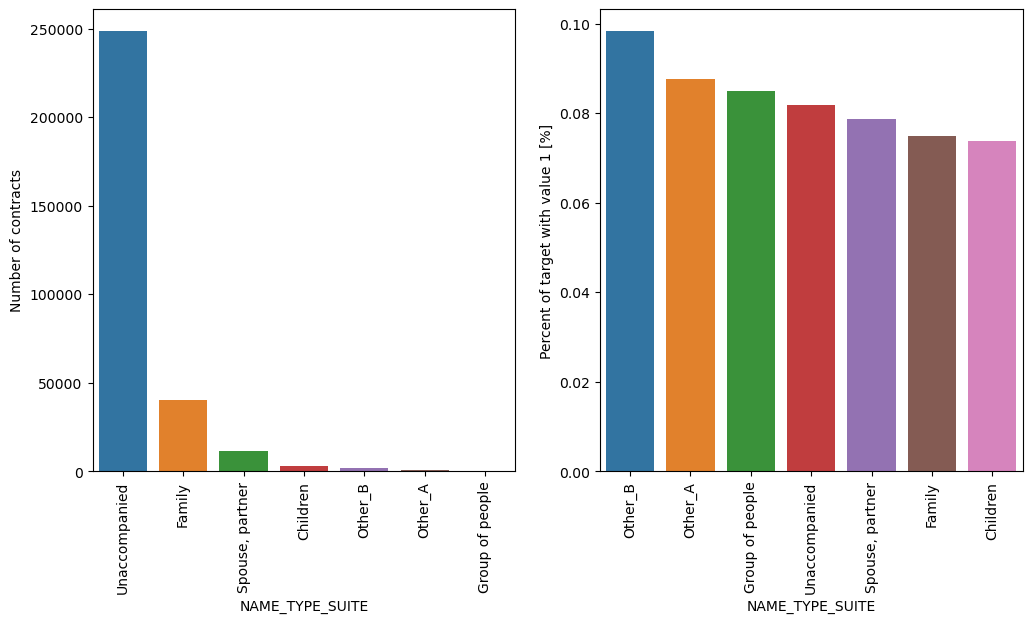

In [18]:
plot_stats('NAME_TYPE_SUITE',True, True)

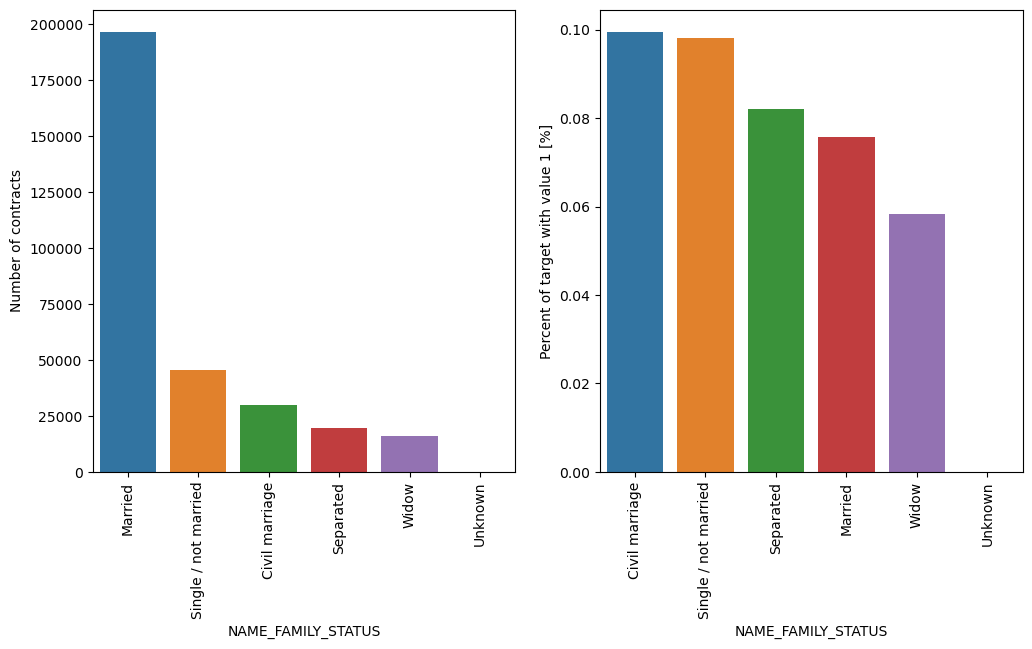

In [19]:
plot_stats('NAME_FAMILY_STATUS',True, True)

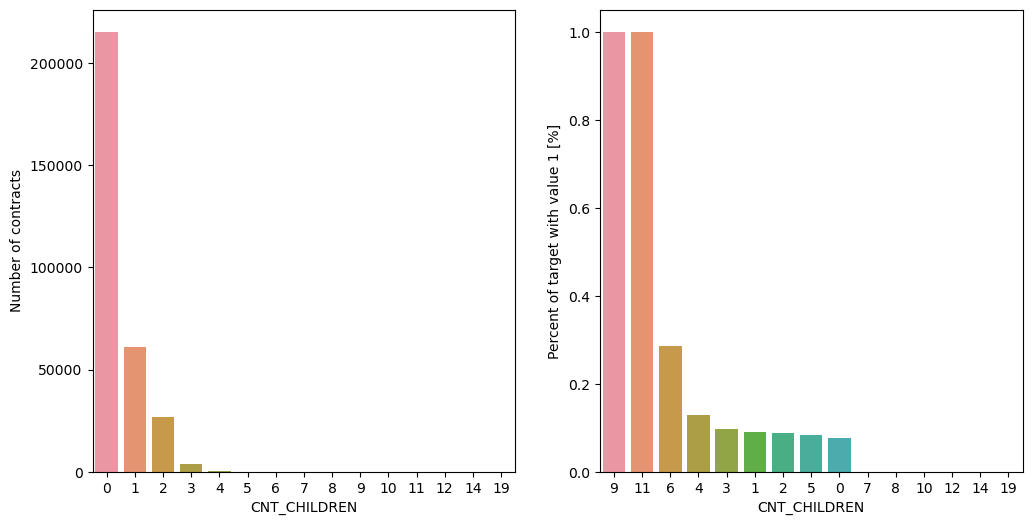

In [20]:
plot_stats('CNT_CHILDREN')

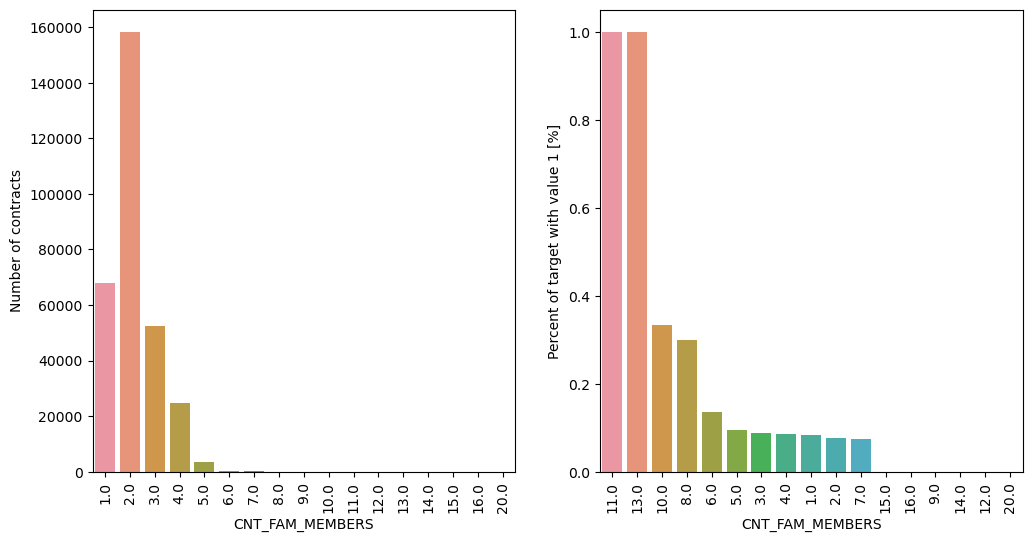

In [21]:
plot_stats('CNT_FAM_MEMBERS',True)

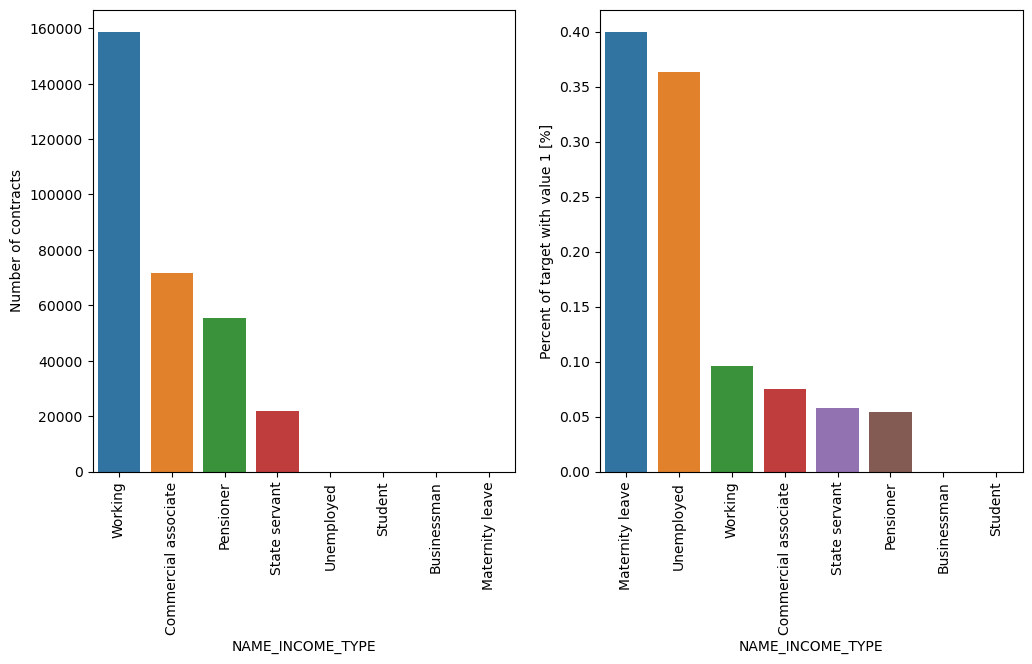

In [22]:
plot_stats('NAME_INCOME_TYPE',True,True)

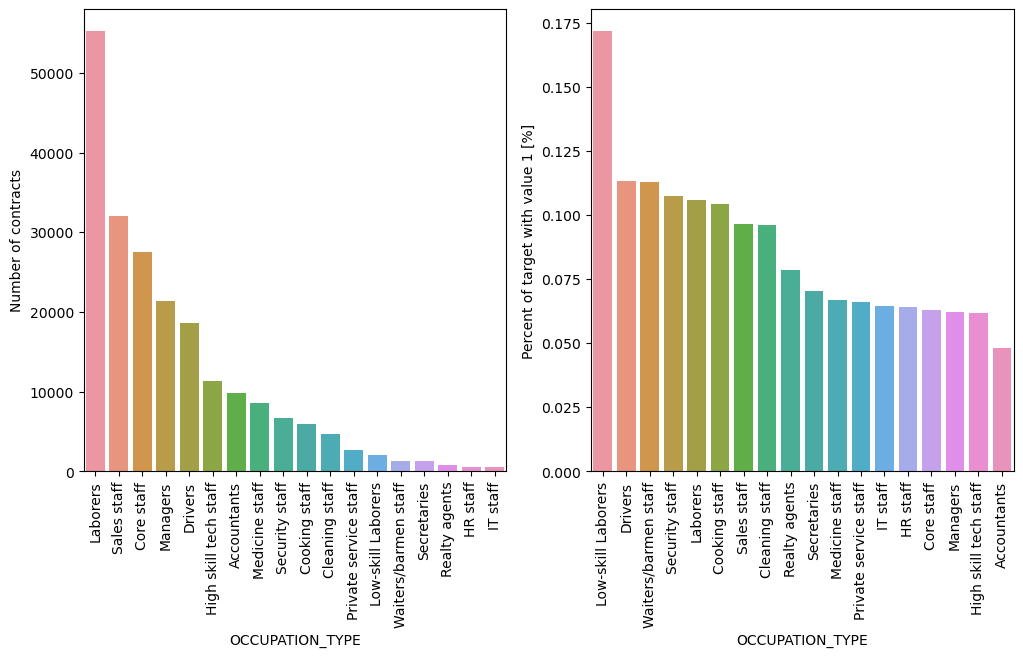

In [23]:
plot_stats('OCCUPATION_TYPE',True, True)

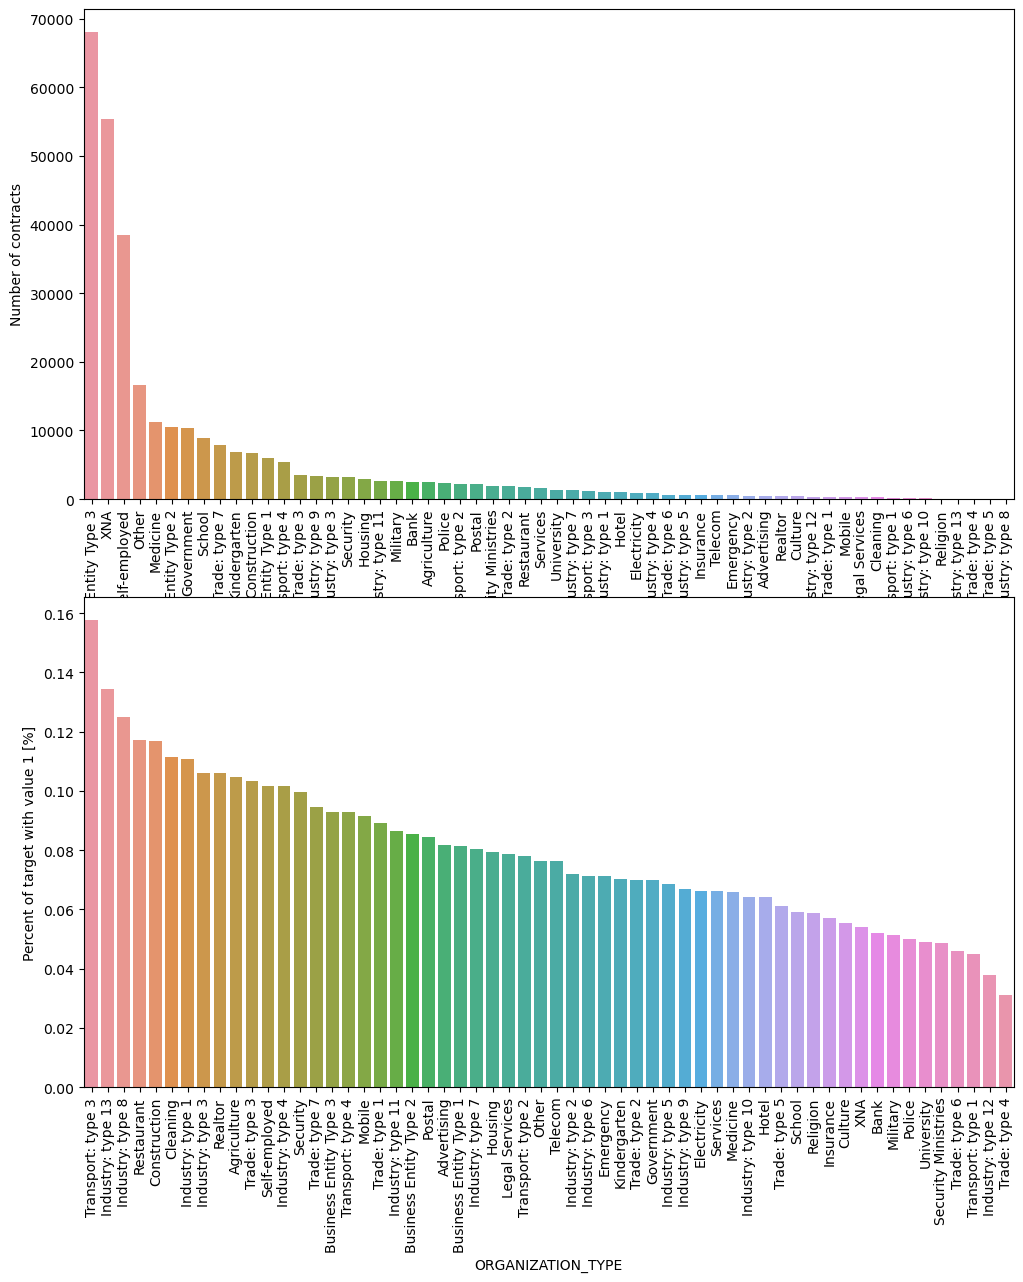

In [24]:
plot_stats('ORGANIZATION_TYPE',True, False)

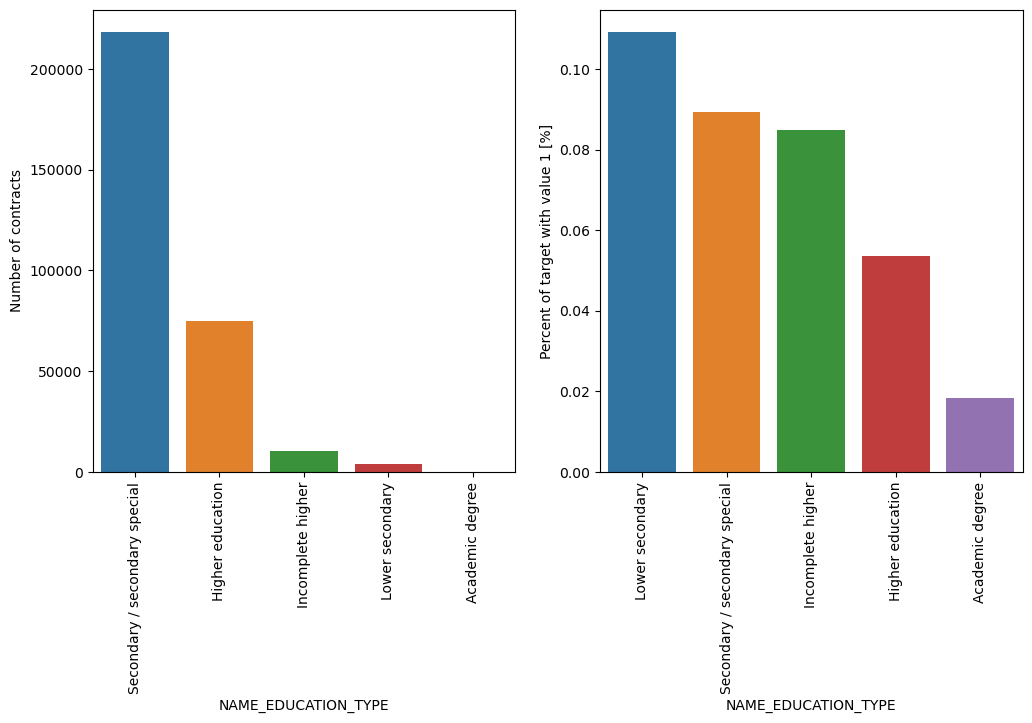

In [25]:
plot_stats('NAME_EDUCATION_TYPE',True)

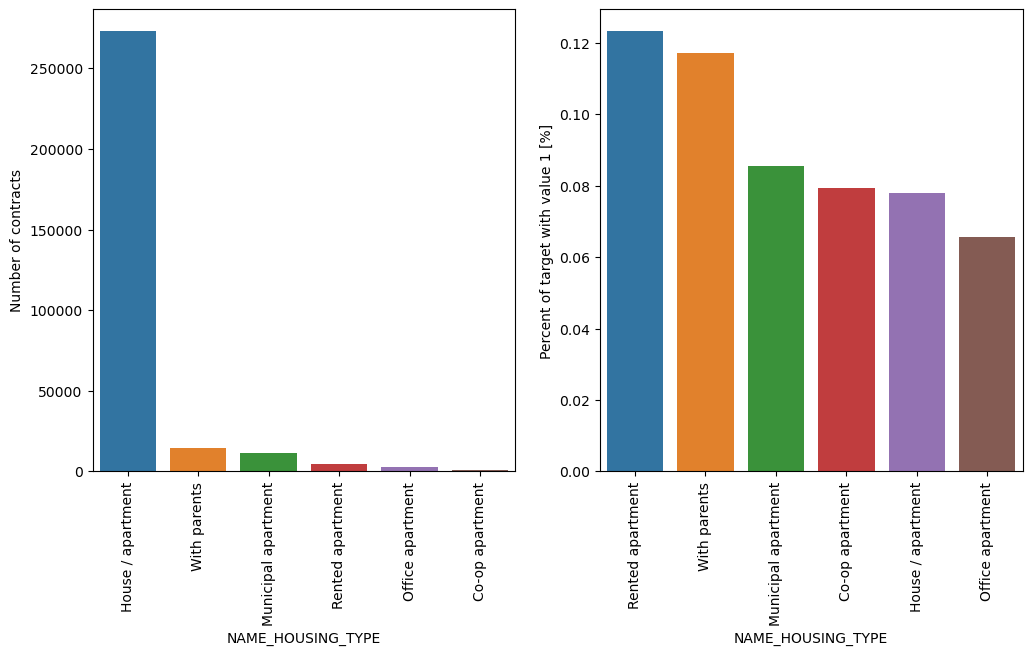

In [26]:
plot_stats('NAME_HOUSING_TYPE',True)

In [27]:
# Plot distribution of one feature
def plot_distribution(feature,color):
    plt.figure(figsize=(10,6))
    plt.title("Distribution of %s" % feature)
    sns.distplot(application_train[feature].dropna(),color=color, kde=True,bins=100)
    plt.show()  

In [28]:
# Plot distribution of multiple features, with TARGET = 1/0 on the same graph
def plot_distribution_comp(var,nrow=2):
    
    i = 0
    t1 = application_train.loc[application_train['TARGET'] != 0]
    t0 = application_train.loc[application_train['TARGET'] == 0]

    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(nrow,2,figsize=(12,6*nrow))

    for feature in var:
        i += 1
        plt.subplot(nrow,2,i)
        sns.kdeplot(t1[feature], bw=0.5,label="TARGET = 1")
        sns.kdeplot(t0[feature], bw=0.5,label="TARGET = 0")
        plt.ylabel('Density plot', fontsize=12)
        plt.xlabel(feature, fontsize=12)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show();

In [29]:
application_train['AMT_INCOME_TOTAL'].min(),application_train['AMT_INCOME_TOTAL'].max()

(25650.0, 117000000.0)

In [30]:
import pandas as pd
import numpy as np

# Generating sample data
np.random.seed(42)  # For reproducibility
amt_credit = np.random.normal(loc=500000, scale=200000, size=1000)
amt_income_total = np.random.normal(loc=200000, scale=100000, size=1000)

# Creating a DataFrame
df = pd.DataFrame({
    'AMT_CREDIT': amt_credit,
    'AMT_INCOME_TOTAL': amt_income_total
})

# Percentiles to calculate
percentiles = [0, 10, 25, 50, 75, 90, 100]

# Calculate percentiles for AMT_CREDIT
amt_credit_percentiles = np.percentile(df['AMT_CREDIT'], percentiles)
# Calculate percentiles for AMT_INCOME_TOTAL
amt_income_total_percentiles = np.percentile(df['AMT_INCOME_TOTAL'], percentiles)

# Create a DataFrame to display the results
percentile_df = pd.DataFrame({
    'Percentile': percentiles,
    'AMT_CREDIT': amt_credit_percentiles,
    'AMT_INCOME_TOTAL': amt_income_total_percentiles
})

print(percentile_df)


   Percentile    AMT_CREDIT  AMT_INCOME_TOTAL
0           0 -1.482535e+05     -94038.863466
1          10  2.510474e+05      80633.435078
2          25  3.704819e+05     139375.831097
3          50  5.050601e+05     206307.713233
4          75  6.295888e+05     272888.217703
5          90  7.611290e+05     332941.977227
6         100  1.270546e+06     519310.756784


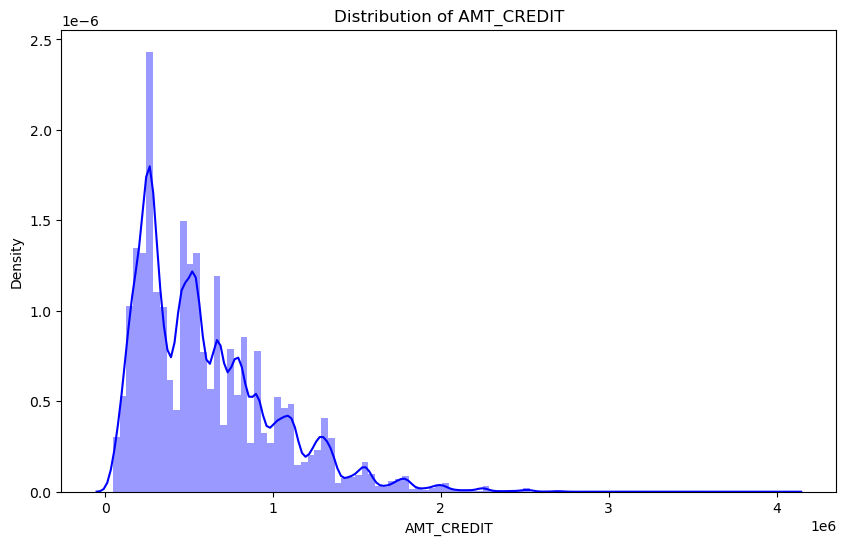

In [31]:
plot_distribution('AMT_CREDIT','blue')

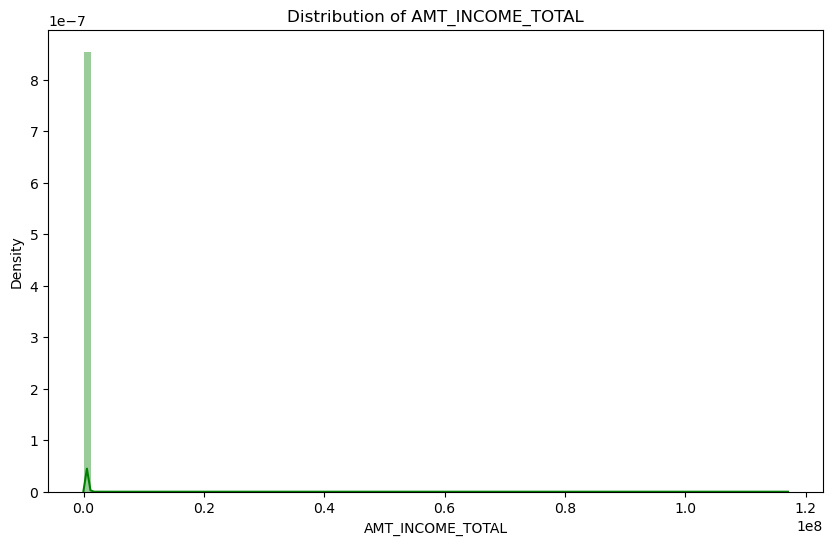

In [32]:
plot_distribution('AMT_INCOME_TOTAL', 'green')

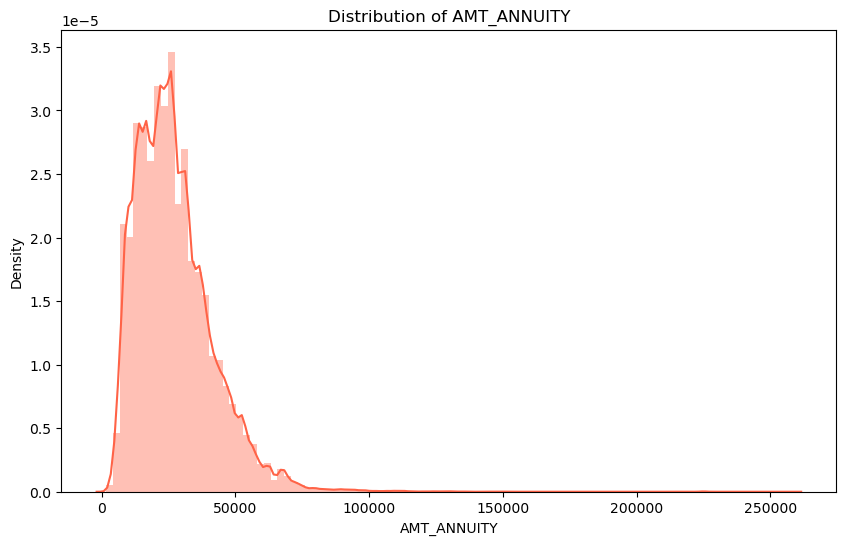

In [33]:
plot_distribution('AMT_ANNUITY','tomato')

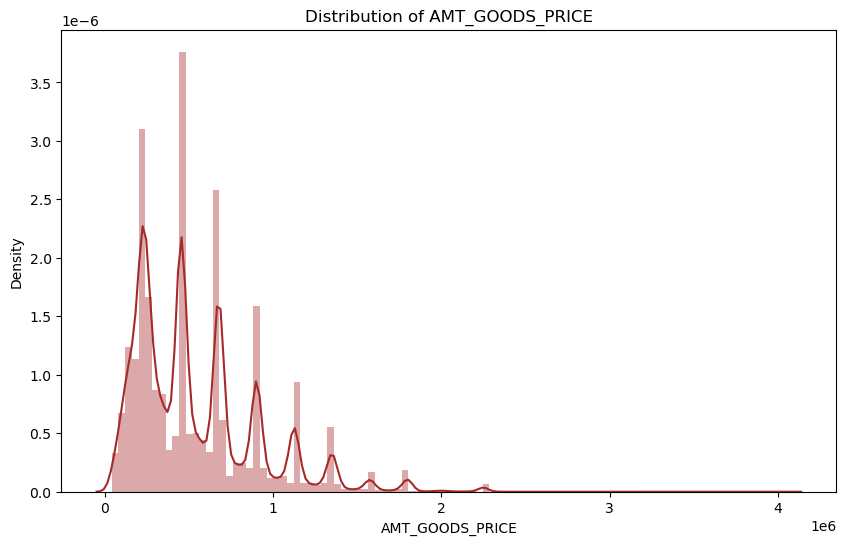

In [34]:
plot_distribution('AMT_GOODS_PRICE','brown')

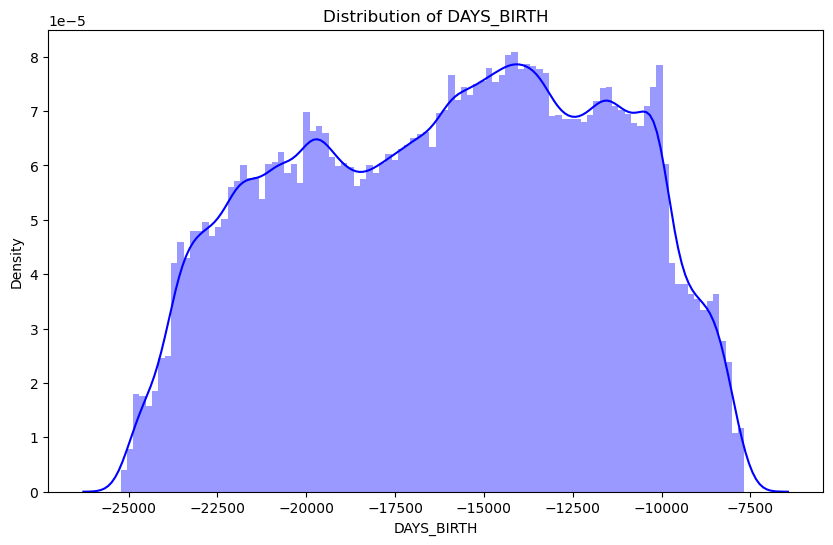

In [35]:
plot_distribution('DAYS_BIRTH','blue')

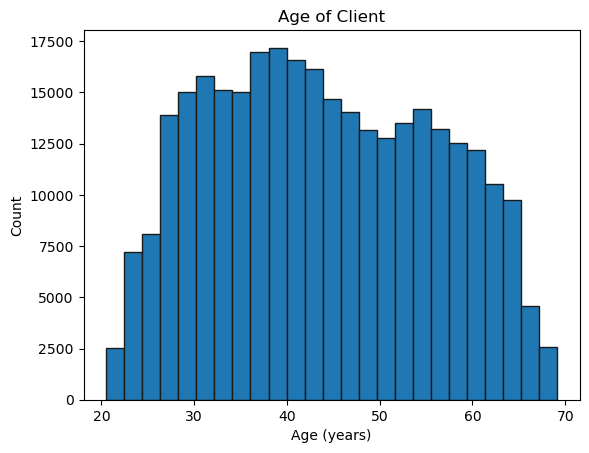

In [36]:
application_train['DAYS_BIRTH'] = abs(application_train['DAYS_BIRTH'])

# Plot the distribution of ages in years
plt.hist(application_train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

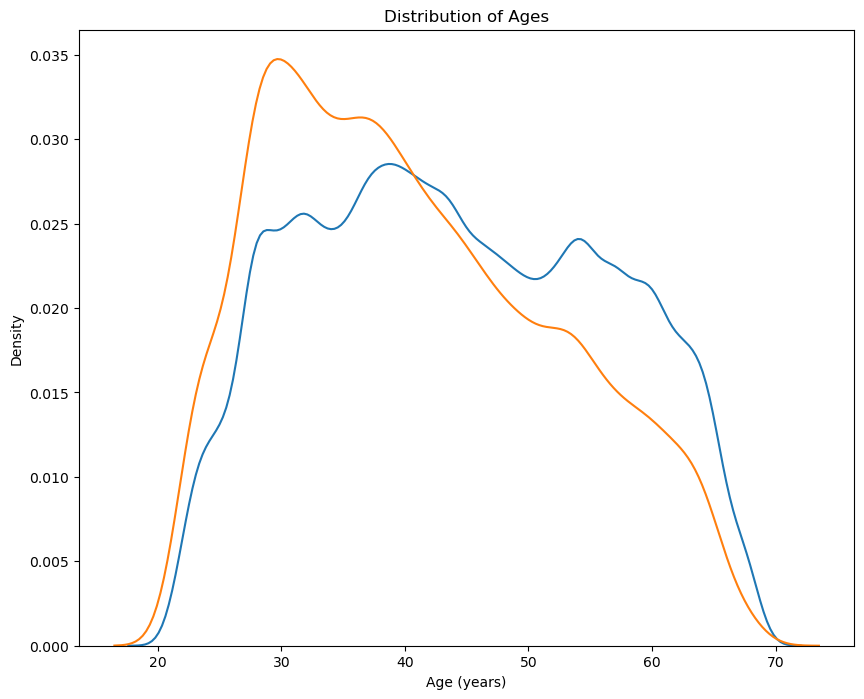

In [37]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(application_train.loc[application_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(application_train.loc[application_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

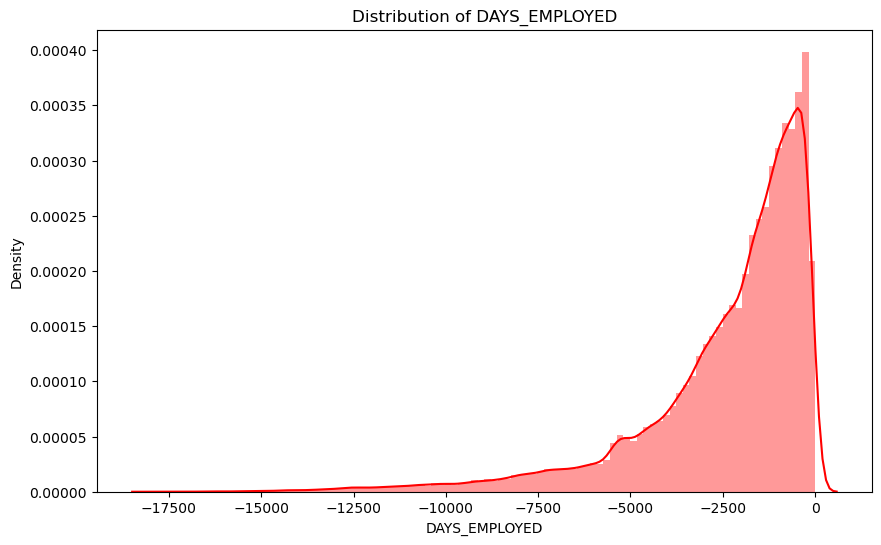

In [38]:
# Replace the anomalous values with nan
application_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

plot_distribution('DAYS_EMPLOYED','red')

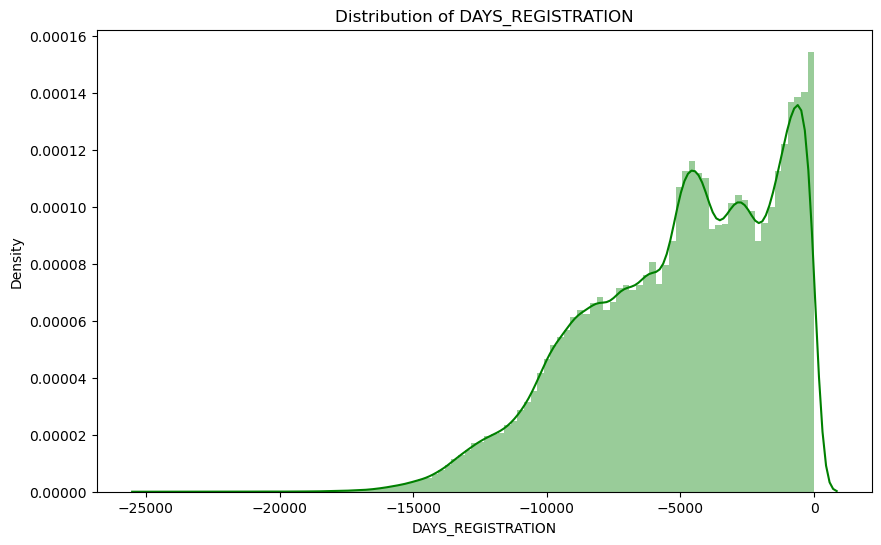

In [39]:
plot_distribution('DAYS_REGISTRATION','green')

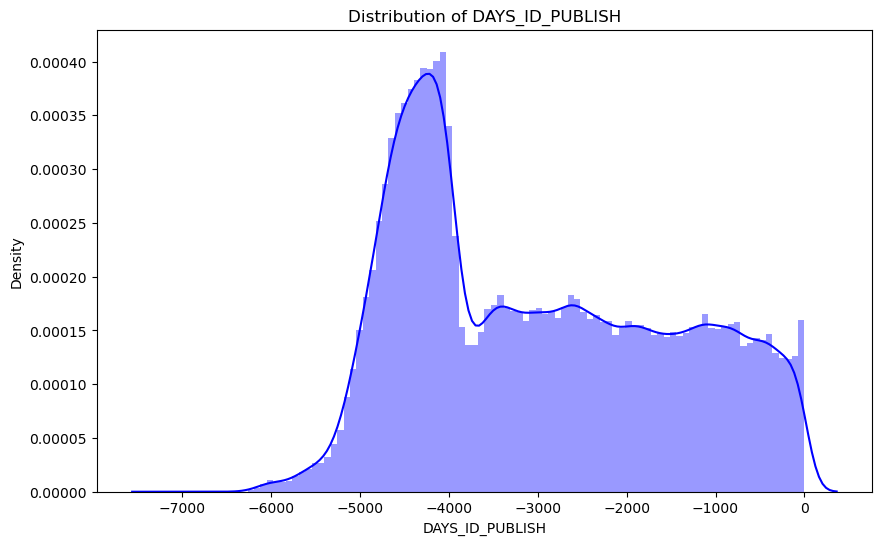

In [40]:
plot_distribution('DAYS_ID_PUBLISH','blue')

<Figure size 1600x2400 with 0 Axes>

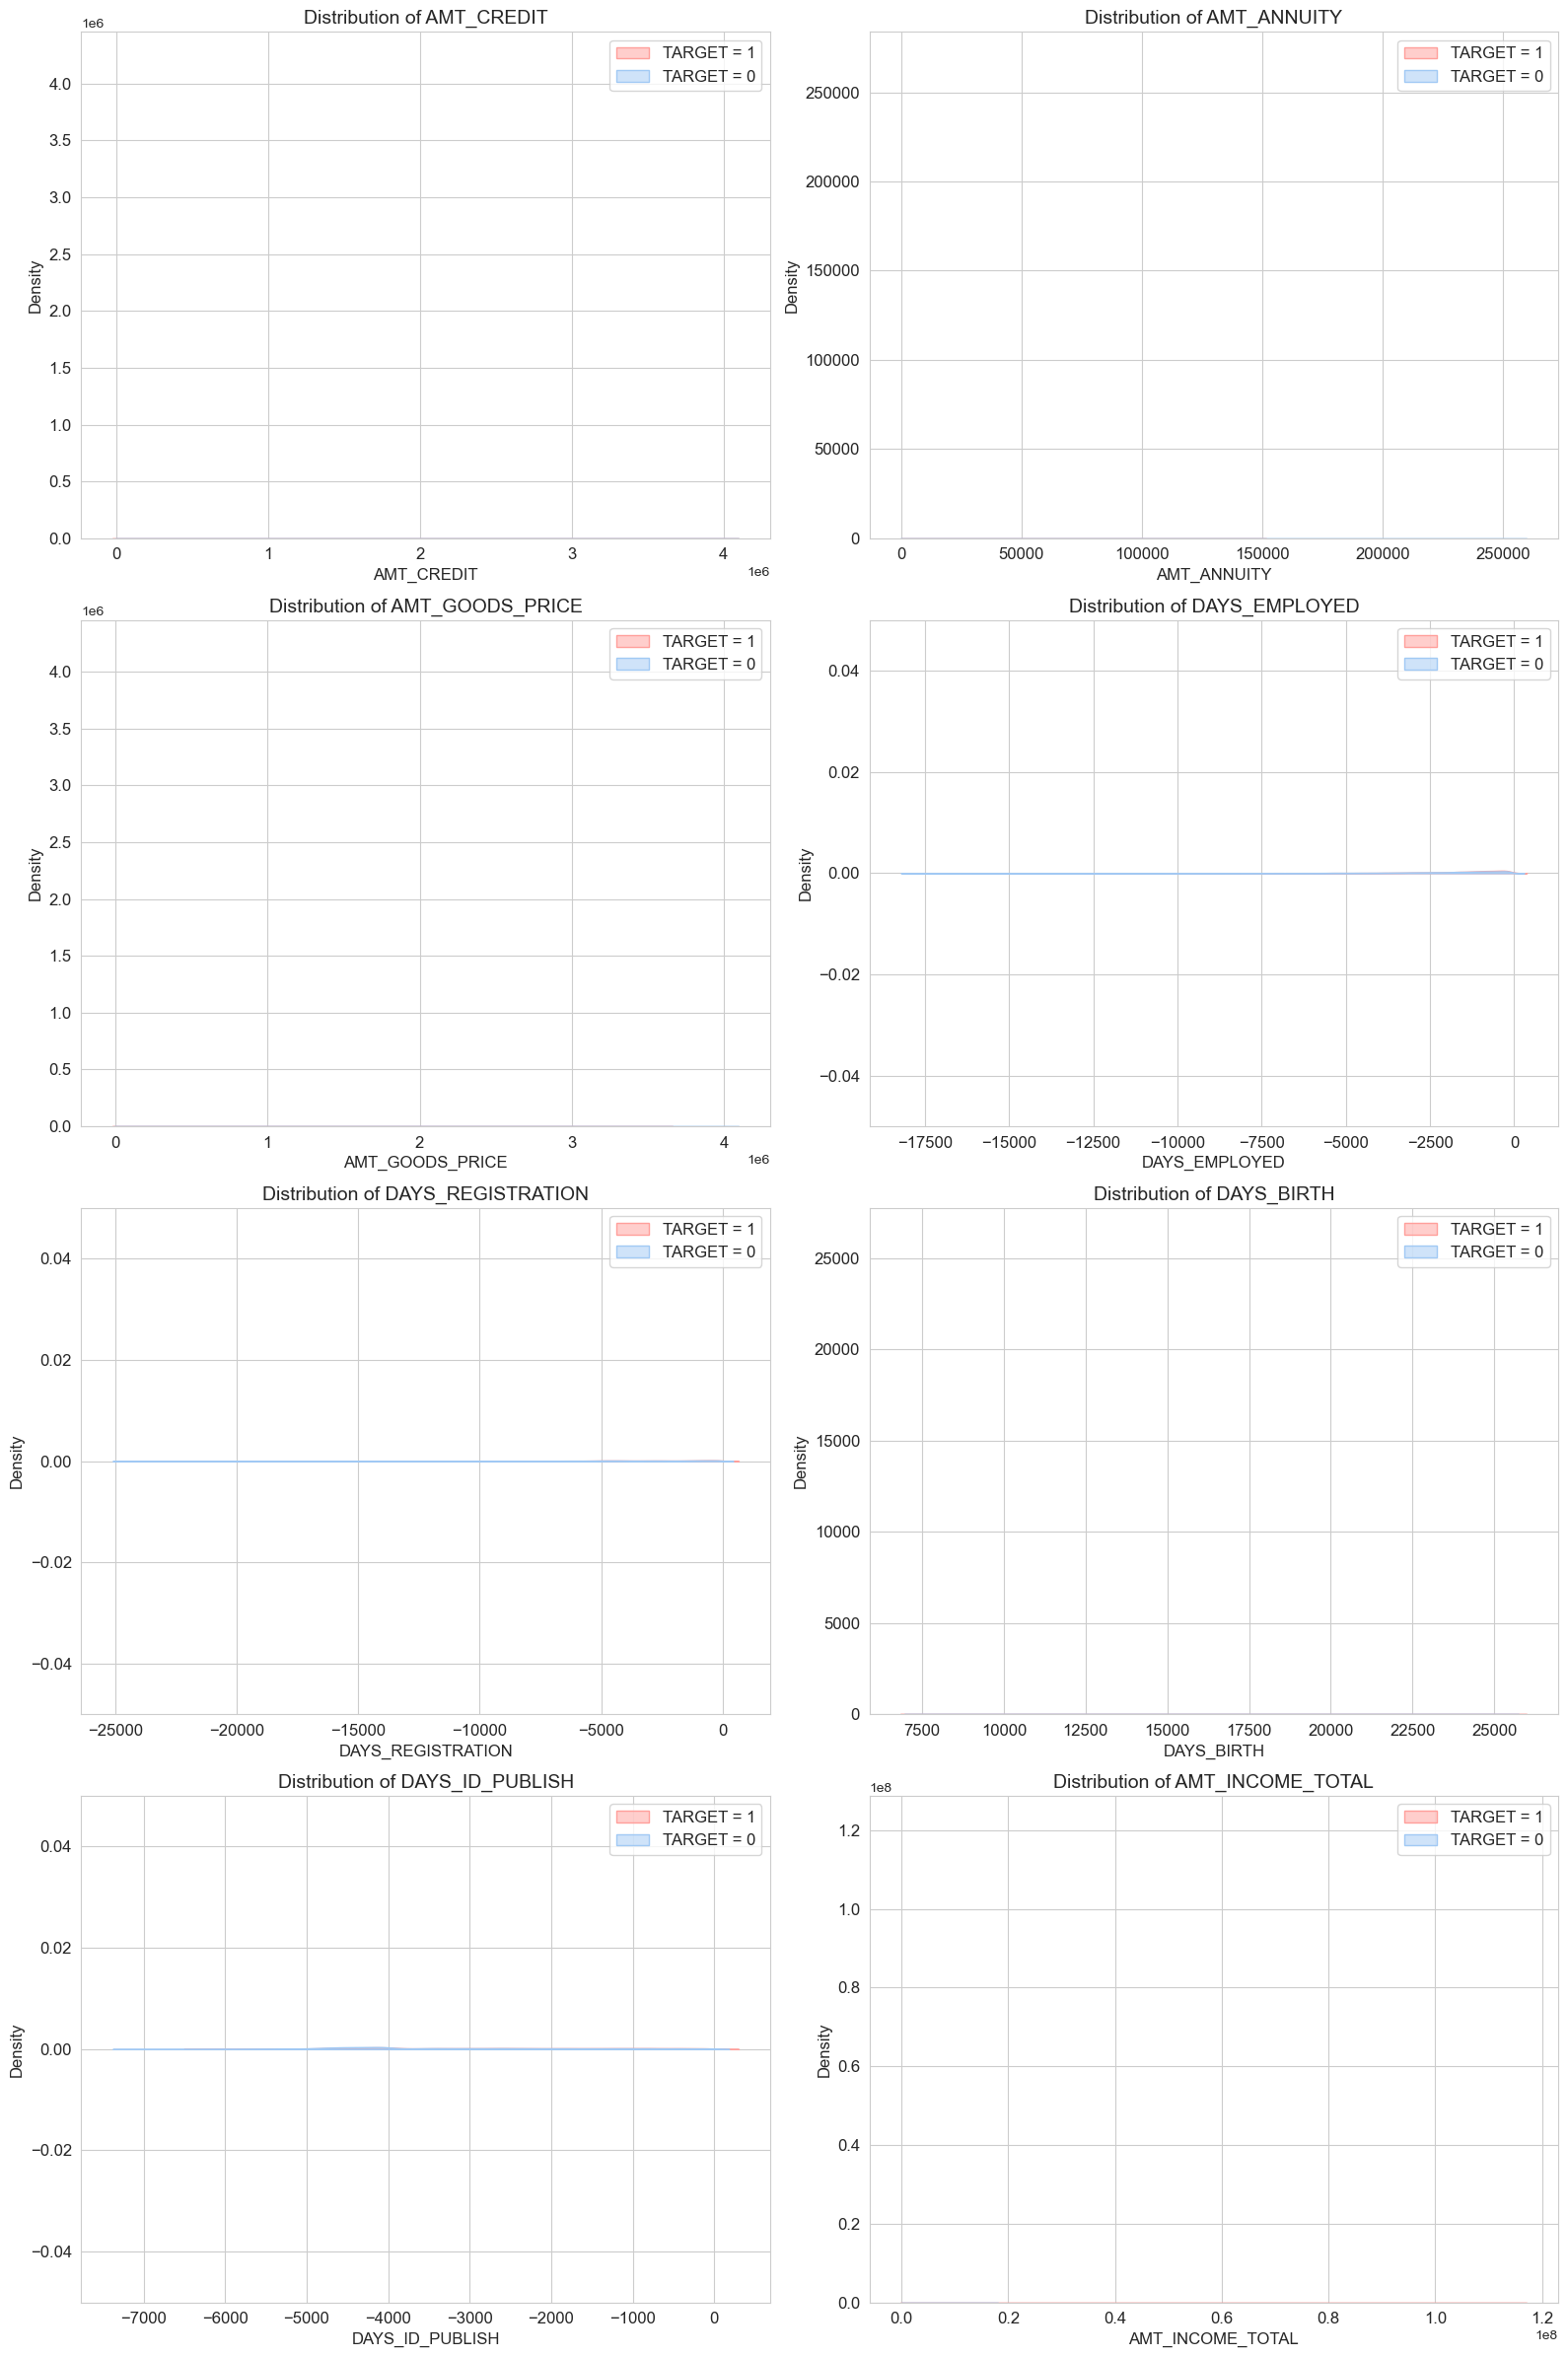

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_distribution_comp(var, nrow=2, ncol=2):
    """
    Plot the distribution of multiple features with TARGET = 1/0 on the same graph.

    Parameters:
    var (list): List of feature names to plot.
    nrow (int): Number of rows in the plot grid. Default is 2.
    ncol (int): Number of columns in the plot grid. Default is 2.
    """
    # Ensure the total number of subplots
    total_plots = len(var)
    # Calculate the number of rows required if not provided
    if nrow * ncol < total_plots:
        nrow = (total_plots + ncol - 1) // ncol

    # Split the data based on TARGET values
    t1 = application_train.loc[application_train['TARGET'] != 0]
    t0 = application_train.loc[application_train['TARGET'] == 0]

    sns.set_style('whitegrid')
    plt.figure(figsize=(16, 6 * nrow))
    fig, ax = plt.subplots(nrow, ncol, figsize=(16, 6 * nrow))
    ax = ax.flatten()  # Flatten the axis array for easy iteration

    for i, feature in enumerate(var):
        sns.kdeplot(t1[feature], bw_adjust=0.5, label="TARGET = 1", ax=ax[i], color='r', fill=True, alpha=0.5)
        sns.kdeplot(t0[feature], bw_adjust=0.5, label="TARGET = 0", ax=ax[i], color='b', fill=True, alpha=0.5)
        ax[i].set_ylabel('Density', fontsize=12)
        ax[i].set_xlabel(feature, fontsize=12)
        ax[i].tick_params(axis='both', which='major', labelsize=12)
        ax[i].set_title(f'Distribution of {feature}', fontsize=14)
        ax[i].legend(loc='best', fontsize=12)
        ax[i].grid(True)

        # Adjust the y-axis scale to make smaller changes visible
        ymax = max(t1[feature].max(), t0[feature].max())
        ax[i].set_ylim(0, ymax * 1.1)

    # Hide any unused subplots
    for j in range(i + 1, nrow * ncol):
        fig.delaxes(ax[j])

    plt.tight_layout()
    plt.show()

# Example usage:
# Assuming 'application_train' is your DataFrame loaded with the appropriate data
# application_train = pd.read_csv('path_to_dataset.csv')

# Specify the variables to plot and the number of rows
var = ['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_EMPLOYED', 
       'DAYS_REGISTRATION', 'DAYS_BIRTH', 'DAYS_ID_PUBLISH', 'AMT_INCOME_TOTAL']

# Call the function with the specified variables and number of rows
plot_distribution_comp(var, nrow=4)


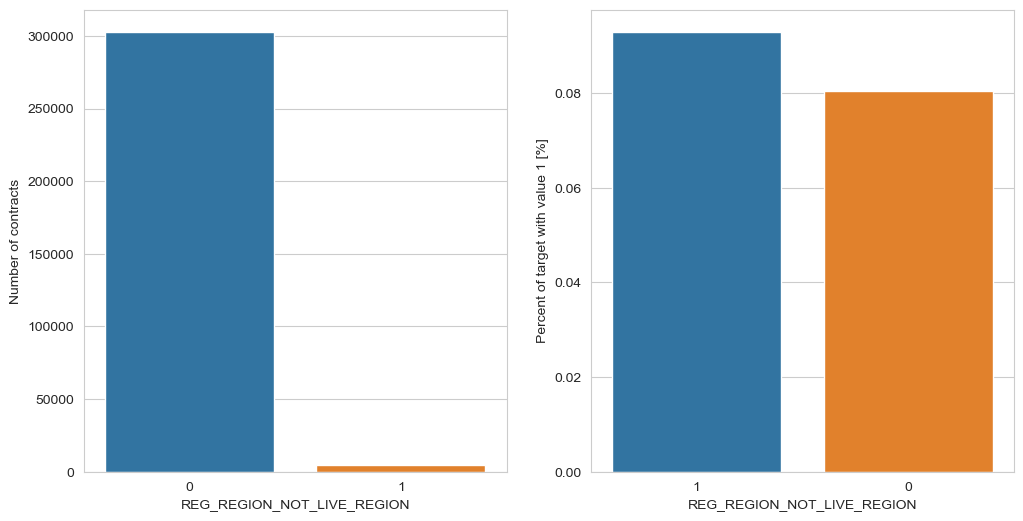

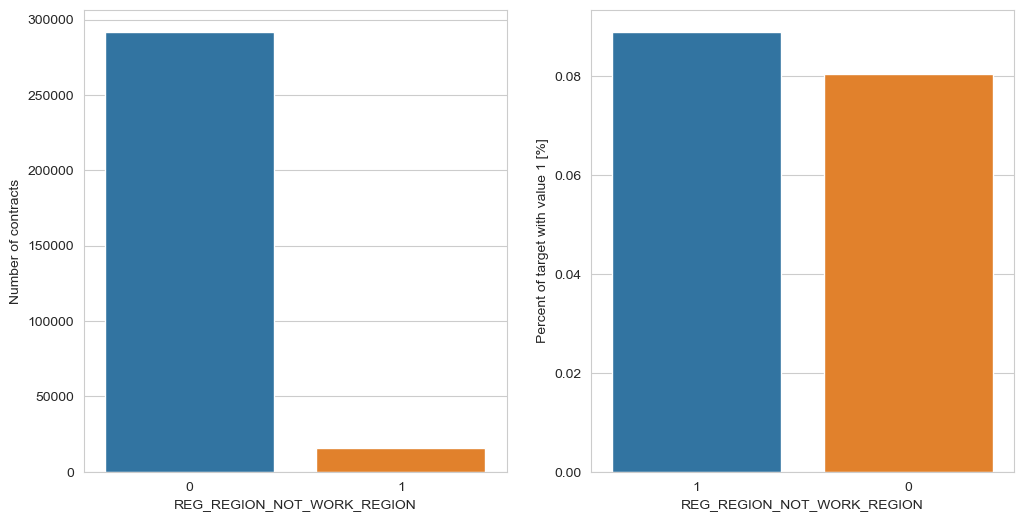

In [42]:
plot_stats('REG_REGION_NOT_LIVE_REGION')
plot_stats('REG_REGION_NOT_WORK_REGION')

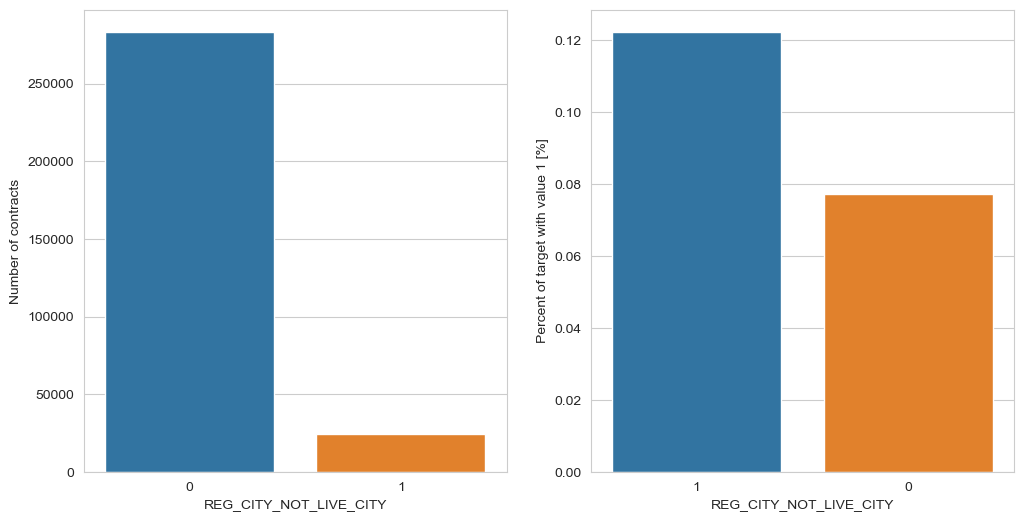

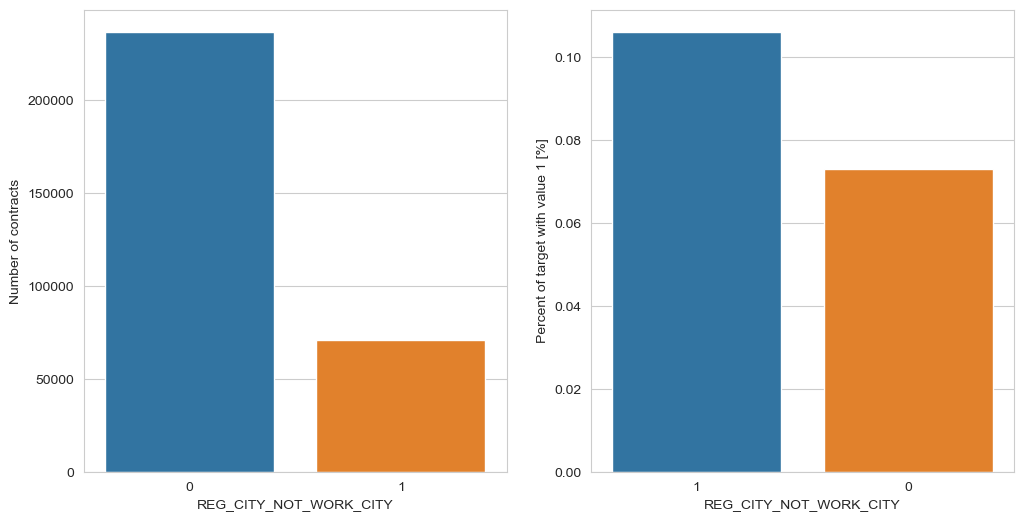

In [43]:
plot_stats('REG_CITY_NOT_LIVE_CITY')
plot_stats('REG_CITY_NOT_WORK_CITY')

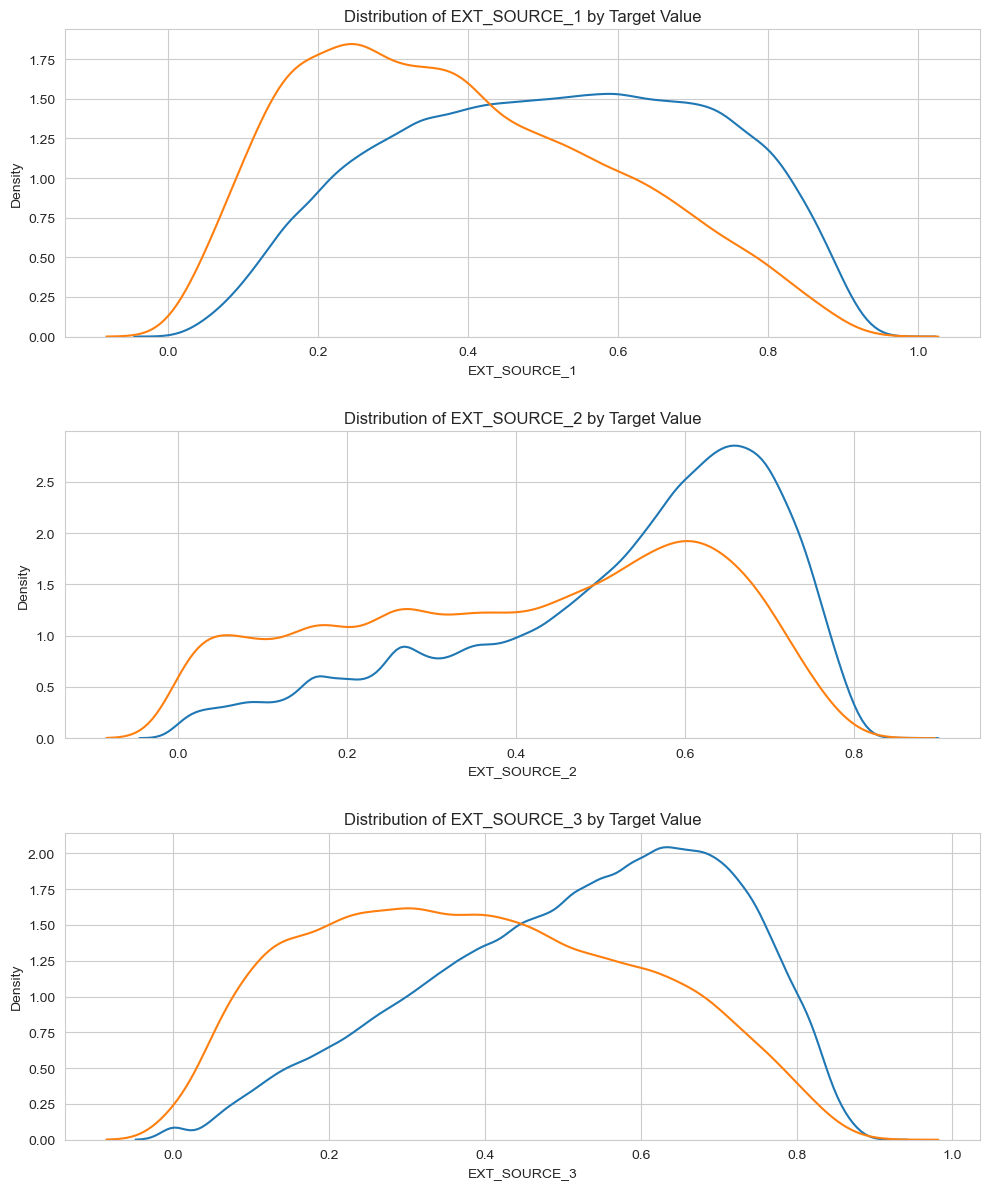

In [44]:
plt.figure(figsize = (10, 12))

# iterate through the sources
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    
    # create a new subplot for each source
    plt.subplot(3, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(application_train.loc[application_train['TARGET'] == 0, source], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(application_train.loc[application_train['TARGET'] == 1, source], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

In [45]:
# Extract the EXT_SOURCE variables and show correlations
ext_data = application_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

TARGET  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3
TARGET        1.000000     -0.155317     -0.160472     -0.178919
EXT_SOURCE_1 -0.155317      1.000000      0.213982      0.186846
EXT_SOURCE_2 -0.160472      0.213982      1.000000      0.109167
EXT_SOURCE_3 -0.178919      0.186846      0.109167      1.000000

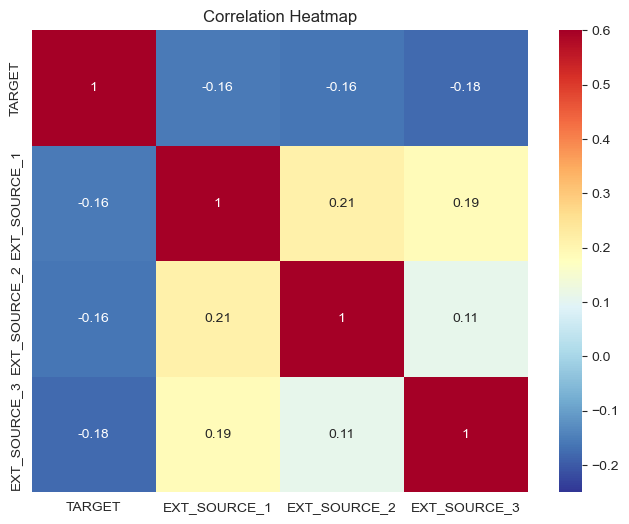

In [46]:
plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

In [47]:
correlations = application_train.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(20))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 OBS_30_CNT_SOCIAL_CIRCLE       0.009131
CNT_FAM_MEMBERS                0.009308
CNT_CHILDREN                   0.019187
AMT_REQ_CREDIT_BUREAU_YEAR     0.019930
FLAG_WORK_PHONE                0.028524
DEF_60_CNT_SOCIAL_CIRCLE       0.031276
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
LIVE_CITY_NOT_WORK_CITY        0.032518
OWN_CAR_AGE                    0.037612
DAYS_REGISTRATION              0.041975
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_EMPLOYED                  0.074958
TARGET                         1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.15

In [48]:
import numpy as np
import pandas as pd

# Assume application_train is already defined and loaded.

# Compute correlations with the TARGET variable
correlations = application_train.corr()['TARGET'].abs().sort_values(ascending=False)

# Display correlations
print('Most Positive Correlations:\n', correlations.head(20))
print('\nMost Negative Correlations:\n', correlations.tail(15))

# Derive a threshold from the correlations
# Let's take a threshold based on the top 10 significant correlations
threshold = correlations.iloc[10]  # Adjust this index as needed

print(f'\nThreshold based on top 10 significant correlations: {threshold:.2f}')


Most Positive Correlations:
 TARGET                         1.000000
EXT_SOURCE_3                   0.178919
EXT_SOURCE_2                   0.160472
EXT_SOURCE_1                   0.155317
DAYS_BIRTH                     0.078239
DAYS_EMPLOYED                  0.074958
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
FLOORSMAX_AVG                  0.044003
FLOORSMAX_MEDI                 0.043768
FLOORSMAX_MODE                 0.043226
DAYS_REGISTRATION              0.041975
AMT_GOODS_PRICE                0.039645
OWN_CAR_AGE                    0.037612
Name: TARGET, dtype: float64

Most Negative Correlations:
 FLAG_DOCUMENT_4               0.002672
SK_ID_CURR                    0.002108
AMT_REQ_CREDIT_BUREAU_QRT     0.00

In [49]:
print('Training shape: ', application_train.shape)

Training shape:  (307511, 122)


In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plot_heatmap(dataframe, figsize=(20, 16), annot_size=5):
    """
    Plot a heatmap of all variables in the dataset.

    Parameters:
    dataframe (pd.DataFrame): The dataset to plot.
    figsize (tuple): The size of the figure. Default is (20, 16).
    annot_size (int): Font size for annotations. Default is 5.
    """
    plt.figure(figsize=figsize)
    sns.set(style='white')

    # Compute the correlation matrix
    corr = dataframe.corr()

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=figsize)

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".2f",
                annot_kws={"size": annot_size})

    plt.title('Heatmap of All Variables in the Dataset', fontsize=20)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.show()

# Example usage with a dataset named application_train
# application_train = pd.read_csv('path_to_dataset.csv')
# plot_heatmap(application_train)


<Figure size 2000x1600 with 0 Axes>

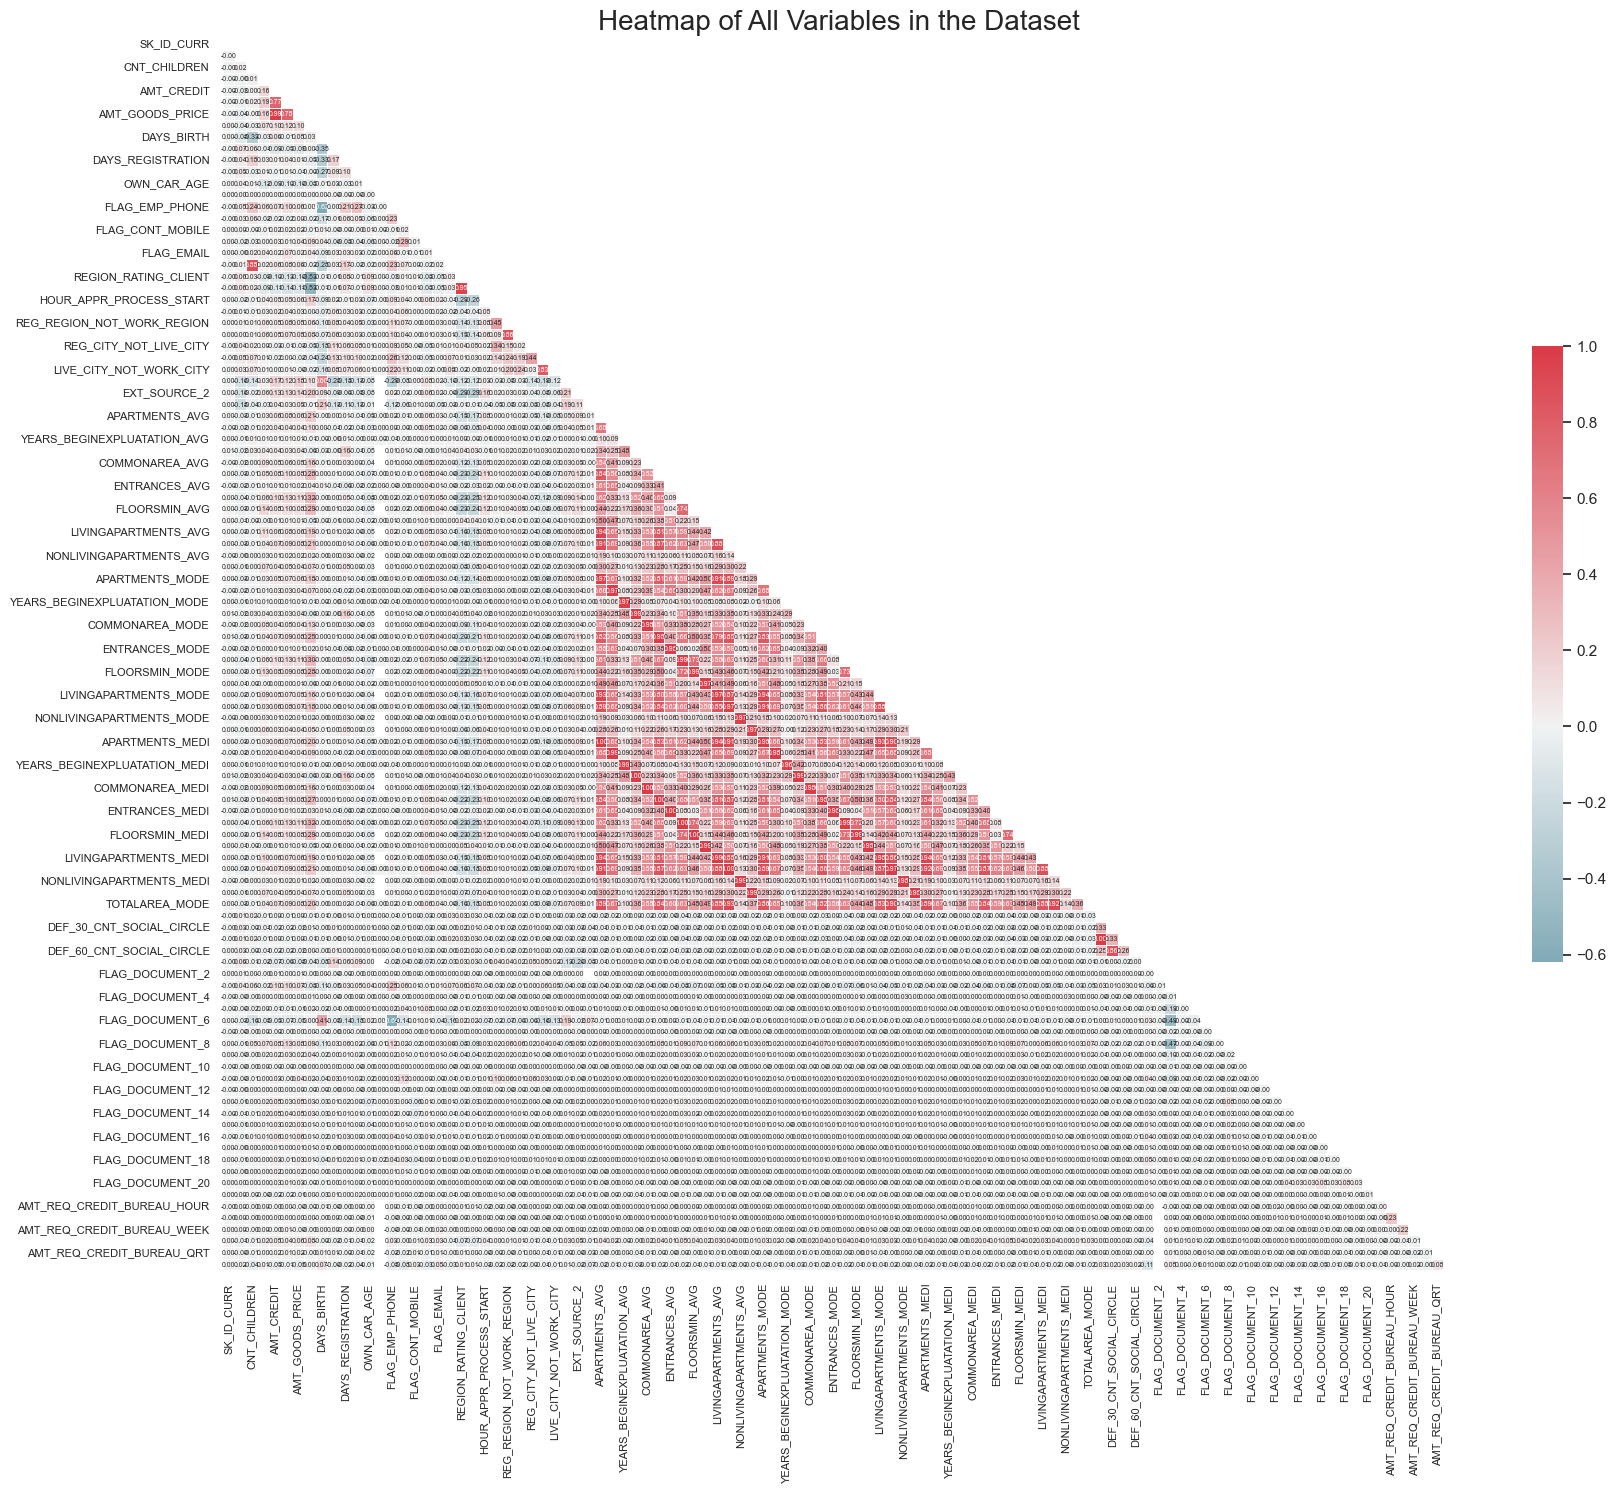

In [51]:
plot_heatmap(application_train)

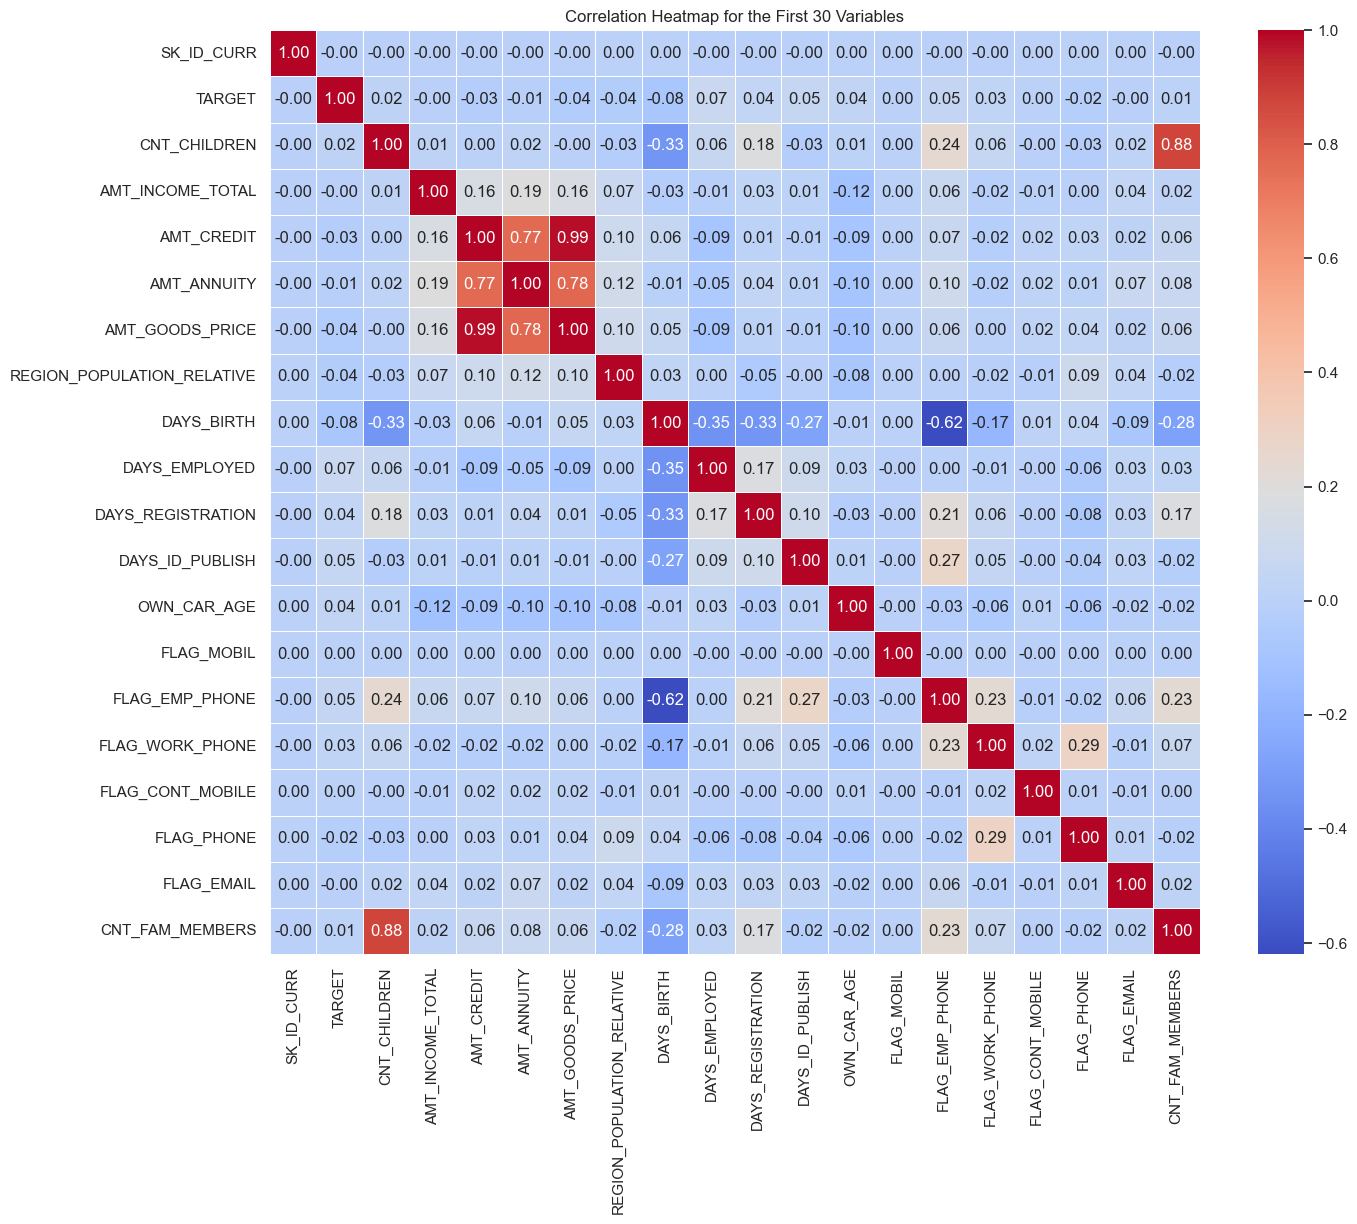

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_heatmap(df, num_vars=30):
    """
    Plots a heatmap of the correlation matrix for the first num_vars variables in the DataFrame.

    Parameters:
    df (DataFrame): The DataFrame containing the data.
    num_vars (int): The number of variables to include in the heatmap. Default is 30.
    """
    # Select the first num_vars columns
    df_subset = df.iloc[:, :num_vars]
    
    # Compute the correlation matrix
    corr_matrix = df_subset.corr()
    
    # Plot the heatmap
    plt.figure(figsize=(15, 12))
    sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
    plt.title(f'Correlation Heatmap for the First {num_vars} Variables')
    plt.show()

# Example usage:
plot_heatmap(application_train, num_vars=30)


In [53]:
import numpy as np
import pandas as pd

# Assume application_train is already defined and loaded.

# Threshold for removing correlated variables
threshold = 0.7

# Absolute value correlation matrix
corr_matrix = application_train.corr().abs()

# Upper triangle of correlations
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))

# Select columns with correlations above threshold
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

print(f'There are {len(to_drop)} columns to remove.')

# Optionally, drop these columns from the DataFrame
# application_train = application_train.drop(columns=to_drop)


There are 41 columns to remove.


In [54]:
to_drop

['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT_W_CITY',
 'LIVE_REGION_NOT_WORK_REGION',
 'LIVE_CITY_NOT_WORK_CITY',
 'ELEVATORS_AVG',
 'FLOORSMIN_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'TOTALAREA_MODE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE']

In [55]:
to_drop =['AMT_GOODS_PRICE',
 'REGION_RATING_CLIENT_W_CITY',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'TOTALAREA_MODE',
 'OBS_60_CNT_SOCIAL_CIRCLE']

In [56]:
# Assume application_train and to_drop are defined as in your scenario
print('Training shape before dropping:', application_train.shape)

# Filter to_drop list to only include columns that exist in application_train
to_drop_existing = [col for col in to_drop if col in application_train.columns]

# Drop columns that exist in to_drop_existing
application_train.drop(columns=to_drop_existing, inplace=True)

print('New Training shape after dropping:', application_train.shape)


Training shape before dropping: (307511, 122)
New Training shape after dropping: (307511, 88)


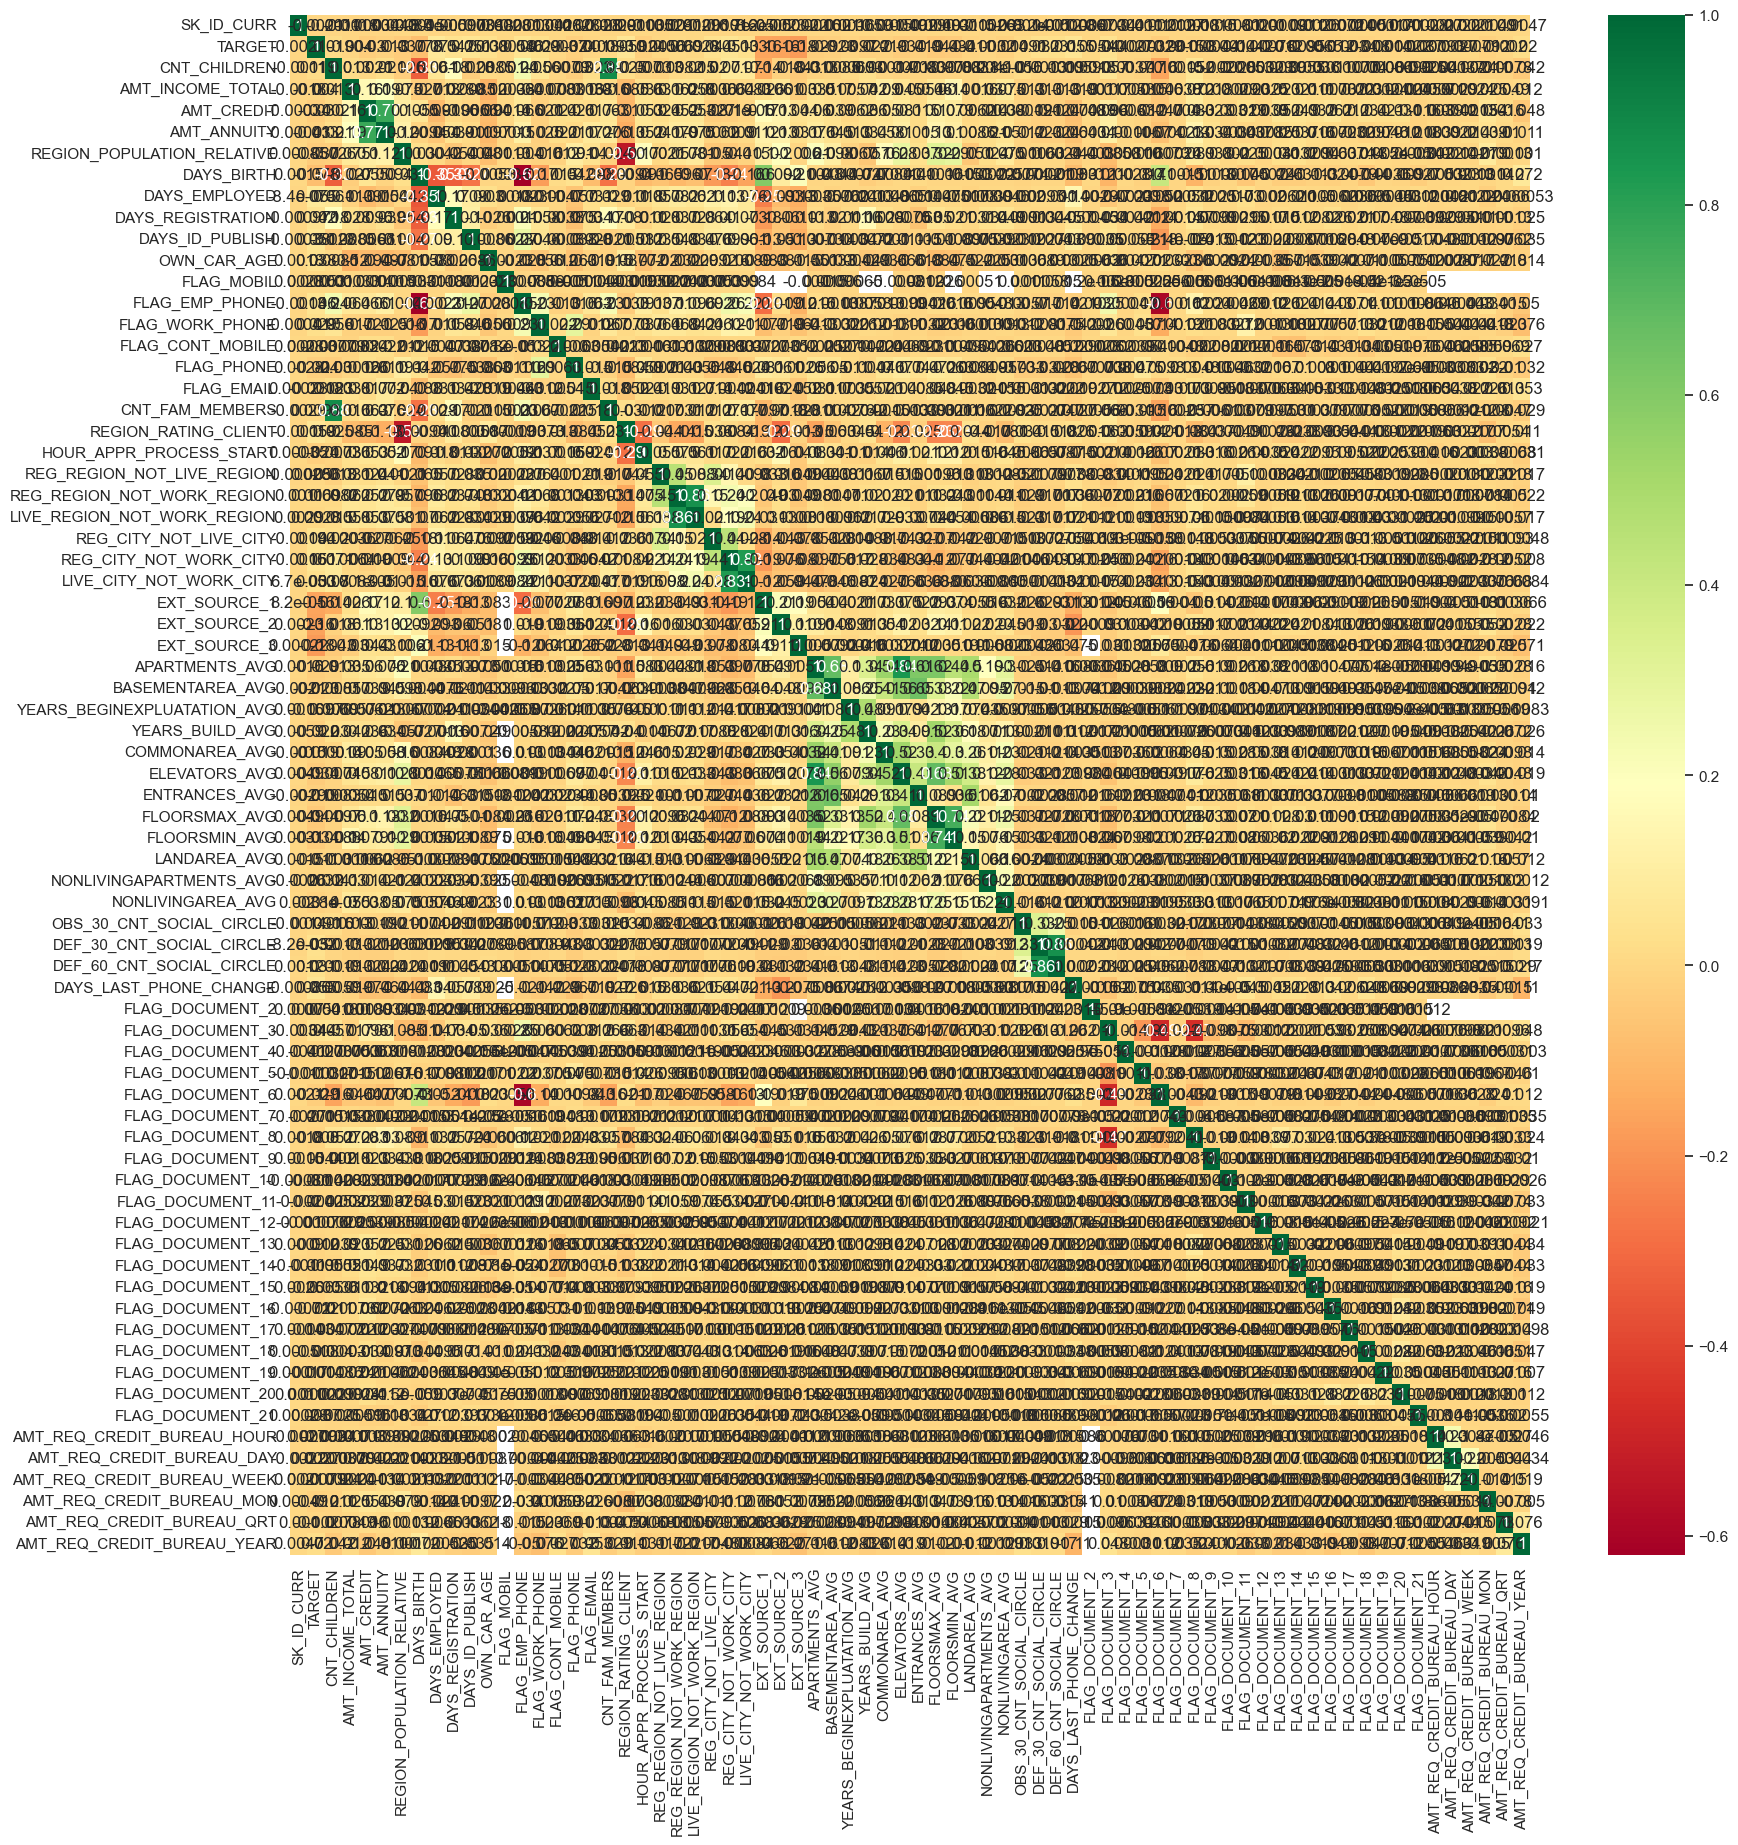

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming corrmat and application_train are defined
corrmat = application_train.corr()
top_corr_features = corrmat.index

plt.figure(figsize=(20,20))
# Plotting the heatmap
g = sns.heatmap(application_train[top_corr_features].corr(), annot=True, cmap="RdYlGn")
plt.show()


<Axes: >

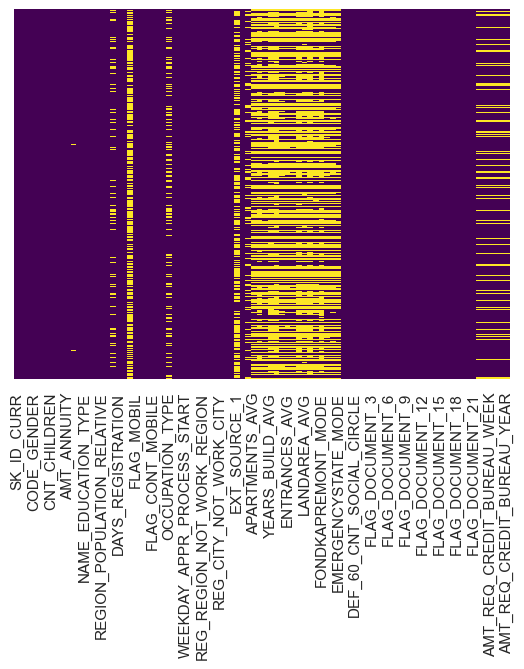

In [58]:
sns.heatmap(application_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [59]:
# Missing values statistics
missing_values = missing_values_table(application_train)
missing_values.head(40)

Your selected dataframe has 88 columns.
There are 35 columns that have missing values.


Missing Values  % of Total Values
COMMONAREA_AVG                       214865               69.9
NONLIVINGAPARTMENTS_AVG              213514               69.4
FONDKAPREMONT_MODE                   210295               68.4
FLOORSMIN_AVG                        208642               67.8
YEARS_BUILD_AVG                      204488               66.5
OWN_CAR_AGE                          202929               66.0
LANDAREA_AVG                         182590               59.4
BASEMENTAREA_AVG                     179943               58.5
EXT_SOURCE_1                         173378               56.4
NONLIVINGAREA_AVG                    169682               55.2
ELEVATORS_AVG                        163891               53.3
WALLSMATERIAL_MODE                   156341               50.8
APARTMENTS_AVG                       156061               50.7
ENTRANCES_AVG                        154828               50.3
HOUSETYPE_MODE                       154297               50.2
FLOORSMAX_AVG                        153020               49.8
YEARS_BEGINEXPLUATATION_AVG          150007               48.8
EMERGENCYSTATE_MODE                  145755               47.4
OCCUPATION_TYPE                       96391               31.3
EXT_SOURCE_3                          60965               19.8
DAYS_EMPLOYED                         55374               18.0
AMT_REQ_CREDIT_BUREAU_WEEK            41519               13.5
AMT_REQ_CREDIT_BUREAU_QRT             41519               13.5
AMT_REQ_CREDIT_BUREAU_HOUR            41519               13.5
AMT_REQ_CREDIT_BUREAU_MON             41519               13.5
AMT_REQ_CREDIT_BUREAU_DAY             41519               13.5
AMT_REQ_CREDIT_BUREAU_YEAR            41519               13.5
NAME_TYPE_SUITE                        1292                0.4
DEF_60_CNT_SOCIAL_CIRCLE               1021                0.3
DEF_30_CNT_SOCIAL_CIRCLE               1021                0.3
OBS_30_CNT_SOCIAL_CIRCLE               1021                0.3
EXT_SOURCE_2                            660                0.2
AMT_ANNUITY                              12                0.0
CNT_FAM_MEMBERS                           2                0.0
DAYS_LAST_PHONE_CHANGE                    1                0.0

In [60]:
application_train.select_dtypes('object').isnull().sum()

NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
OCCUPATION_TYPE                96391
WEEKDAY_APPR_PROCESS_START         0
ORGANIZATION_TYPE                  0
FONDKAPREMONT_MODE            210295
HOUSETYPE_MODE                154297
WALLSMATERIAL_MODE            156341
EMERGENCYSTATE_MODE           145755
dtype: int64

In [61]:
categorical_vars = [var for var in application_train.columns if application_train[var].isnull().mean()>0 and
                   application_train[var].dtypes=='O']
categorical_vars

['NAME_TYPE_SUITE',
 'OCCUPATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

In [62]:
numeric_vars=missing_values.index.tolist()
numeric_vars = [e for e in numeric_vars if e not in categorical_vars]
numeric_vars

['COMMONAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'FLOORSMIN_AVG',
 'YEARS_BUILD_AVG',
 'OWN_CAR_AGE',
 'LANDAREA_AVG',
 'BASEMENTAREA_AVG',
 'EXT_SOURCE_1',
 'NONLIVINGAREA_AVG',
 'ELEVATORS_AVG',
 'APARTMENTS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'EXT_SOURCE_3',
 'DAYS_EMPLOYED',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'EXT_SOURCE_2',
 'AMT_ANNUITY',
 'CNT_FAM_MEMBERS',
 'DAYS_LAST_PHONE_CHANGE']

In [63]:
from sklearn.impute import SimpleImputer 

imputer = SimpleImputer(missing_values=np.nan, strategy='median')


application_train[numeric_vars] = imputer.fit_transform(application_train[numeric_vars])

In [64]:
print(application_train['NAME_TYPE_SUITE'].mode())


0    Unaccompanied
Name: NAME_TYPE_SUITE, dtype: object


In [65]:
application_train['NAME_TYPE_SUITE'].fillna('Unaccompanied',inplace=True)

In [66]:
print(application_train['OCCUPATION_TYPE'].mode())

0    Laborers
Name: OCCUPATION_TYPE, dtype: object


In [67]:
application_train['OCCUPATION_TYPE'].fillna('Laborers',inplace=True)

In [68]:
print(application_train['FONDKAPREMONT_MODE'].mode())

0    reg oper account
Name: FONDKAPREMONT_MODE, dtype: object


In [69]:
application_train['FONDKAPREMONT_MODE'].fillna('reg oper account',inplace=True)

In [70]:
print(application_train['HOUSETYPE_MODE'].mode())

0    block of flats
Name: HOUSETYPE_MODE, dtype: object


In [71]:
application_train['HOUSETYPE_MODE'].fillna('block of flats',inplace=True)

In [72]:
print(application_train['WALLSMATERIAL_MODE'].mode())

0    Panel
Name: WALLSMATERIAL_MODE, dtype: object


In [73]:
application_train['WALLSMATERIAL_MODE'].fillna('Panel',inplace=True)

In [74]:
print(application_train['EMERGENCYSTATE_MODE'].mode()) 

0    No
Name: EMERGENCYSTATE_MODE, dtype: object


In [75]:
application_train['EMERGENCYSTATE_MODE'].fillna('No',inplace=True)

In [76]:
application_train.isnull().sum().sum()

0

In [77]:
application_train.shape

(307511, 88)

In [78]:
from sklearn.preprocessing import LabelEncoder

In [79]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in application_train:
    if application_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(application_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(application_train[col])
            # Transform both training and testing data
            application_train[col] = le.transform(application_train[col])
                       
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

4 columns were label encoded.


In [80]:
# one-hot encoding of categorical variables
application_train = pd.get_dummies(application_train)

print('Features shape: ', application_train.shape)

Features shape:  (307511, 208)


In [81]:
application_train['CREDIT_INCOME_PERCENT'] = application_train['AMT_CREDIT'] / application_train['AMT_INCOME_TOTAL']
application_train['ANNUITY_INCOME_PERCENT'] = application_train['AMT_ANNUITY'] / application_train['AMT_INCOME_TOTAL']
application_train['CREDIT_TERM'] = application_train['AMT_ANNUITY'] / application_train['AMT_CREDIT']
application_train['DAYS_EMPLOYED_PERCENT'] = application_train['DAYS_EMPLOYED'] / application_train['DAYS_BIRTH']

In [82]:
application_train.to_csv('cleandata.csv', index=False)